# DSC 540 Final Project

[1. Abstract](#abstract)

[2. Introduction](#introduction)
[3. Exploratory Analysis Part 1 (Preprocessing and Data Cleaning)](#packages)

* [3 a. Packages](#packages)
* [3 b. Explaining the Data ](#explaining_data)
* [3 c. Record Counts ](#counts)
* [3 d. Missing Values ](#missing_value)
* [3 e. Data Dictionary ](#data_dictionary)
* [3 f. Dropped and Created Features ](#dropped_created)
* [3 g. Statistical Summary ](#statistical_summary)
* [3 h. KNN Imputation for Monthly Rent Payment Variable ](#knn_imputation)
* [3 i. Distribution of Target Variable](#pie_chart)
* [3 j. Correlation Matrix](#correlation_matrix)
* [3 k. Education](#education)
* [3 l. Exploring Regional Difference](#regions)
* [3 m. Urban vs. Rural](#urban_vs_rural)
* [3 n. Gender Differences](#gender)
* [3 o. Overcrowding](#overcrowding)
* [3 p. House Quality (and some feature engineering)](#house_quality)
* [3 q. Dependency](#dependency)
* [3 r. Age](#age)
* [3 s. Distribution of Monthly Rent Payments](#rent)
* [3 t. Distribution of Missing Rent Values](#missing_rent)

[4. Data Reduction Techniques (PCA, KPCA, Feature Selection)](#pca)
* [4 a. PCA](#pca)
* [4 b. Kernel PCA](#kpca)
* [4 c. Feature Selection Using Feature Importance From a Logistic Regression Model](#feature_selection)

[5. Research Questions](#research_questions)
* [5 a. Research Question 1: Can we use PCA to identify the main components that determine poverty level?](#research_question_1)
* [5 b. Research Question 2: Can we develop a model better than our baseline model?](#research_question_2)
* [5 c. Research Question 3: How important are regional differences?](#research_question_3)

[6. Machine Learning](#models)
* [6 a. Train-Test Split](#models)
* [6 b. Logistic Regression](#logistic_regression)
* [6 c. AdaBoost](#adaboost)
* [6 d. Gaussian Naive Bayes](#gnb)
* [6 e. Decision Tree](#decision_tree)
* [6 f. Random Forest](#random_forest)
* [6 g. KNN](#knn)
* [6 h. Neural Network](#neural)
* [6 i. Stochastic Gradient Descent](#sgd)
* [6 j. Support Vector Classifier](#svc)
* [6 k. Rebalancing Techniques](#rebalance)





[7 a. Experiment Results](#experiment_results)

[7 b. Experiment Results for Rebalancing Techniques](#experiment_results_b)

[8. Conclusion](#conclusion)

[9. Contributions](#contributions)
* [9 a. Max Rodrigues](#max_rodrigues)
* [9 b. Andrew Schiek](#andrew_schiek)
* [9 c. Xintong Li](#Xintong_Li)
* [9 c. Mashall Jahangir](#Mashall_Jahangir)

[10. References](#references)





<a id='abstract'></a>

# 1. Abstract
Social programs have a difficulty determining which households are in most desperate need of welfare assistance. Many of the poorest households do not have the records (salary slips, tax returns, etc) to indicate that they are deserving of welfare assistance. Currently, machine learning models that utilize data that describe observable characteristics of homes help to ameliorate this issue. These models are called Proxy Means Tests (PMTs). Performance using these limited features is often inconsistent, especially as populations grow.

The data used for this project is from a Kaggle competition, and the purpose of the competition was to determine if the use of non-traditional econometric features (such as the level of education the head of the household has) can help in determine the households that most need welfare assistance. After preprocessing the data (feature engineering, scaling, PCA, etc), we applied the full data to multiple models and also applied rebalancing techniques to some of these models. We also took a subset of the data to mimic a typical dataset used for PMTs and compared the results. We found that the most important features are actually observable ones, but the inclusion of non-traditional features improves model performance. Data were highly imbalanced, so balancing techniques typically helped with performance. KNN also had strong performance due to its resilience to handle imbalanced data. Our findings indicate that the improvement in metrics with the inclusion of non-traditional features may not be worth the many long man-hours involved in collecting this difficult to obtain data if these techniques are to be applied in other countries.


<a id='introduction'></a>

# 2. Introduction
Many social programs around the world face an issue of assessing social welfare needs (many of the poorest people often do not have the records to indicate they qualify). A workaround to this issue is through the use of machine learning: rather than using income verification records or tax returns, models use a Proxy Means Test (PMT) to assess income qualification. These models use observable features of households (e.g wall or ceiling quality) as an approximation of income level. However, these models are often inaccurate and become unstable as populations change over time.

For this project, we are using data from a Kaggle competition (/www.kaggle.com/c/costa-rican-household-poverty-prediction/data?select=train.csv) to predict how impoverished a household is. Data collectors from the Inter-American Development Bank classified a large number of households (9,557) in Costa Rica into four groups: 

1 = extreme poverty

2 = moderate poverty

3 = vulnerable households

4 = non vulnerable household

In addition to features typically included in a PMT, data regarding information about individuals in the household (e.g. level of education, number of people living in the home, etc) was included with the hopes of improving predictive performance without the need of actual financial records. For this problem, we plan to use a variety of multiclass classification techniques to determine a model that has a high overall performance (F-1 macro average) and identifies extreme & moderate poverty households well (precision, recall and F-1 scores will be used as evaluative measures for these classes). Given the imbalanced nature of the dataset, we will also try rebalancing techniques (under/over-sampling).

In addition to finding a best model, we also want to determine the effectiveness of including non-traditional variables in a PMT model. We used both the entire dataset for prediction as well as a subset of the data that are the features typically included in PMT models. We are also interested in identifying the most important features for predicting poverty to see if non-traditional PMT features are better or worse predictors than than traditional PMT features. The conclusions developed from this analysis can help determine best approaches for assessing social welfare needs for other countries by finding a best model and determining the types of features that should be collected. We will also apply our best model to the Kaggle holdout test set to see how our model performs relative to other Kagglers.



<a id='packages'></a>
## 3. Exploratory Data Analysis Part 1 (Data Cleaning and Preprocessing)
### 3 a. Packages



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn import preprocessing
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from collections import OrderedDict
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
#import graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import KernelPCA
from sklearn.inspection import permutation_importance
from sklearn.impute import KNNImputer
from sklearn.feature_selection import RFE
from sklearn.svm import SVC



#from google.colab import files 
#uploaded = files.upload()

#import io 
#data = pd.read_csv(io.StringIO(uploaded["train.csv"].decode('utf-8')),sep=',')
data = pd.read_csv("train.csv")
data.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


<a id='explaining_data[link text](https://)'></a>

## 3 b. Explain your data (Explanatory & Target Variable)


The data are a mixture of categorical, numeric and one-hot encoded variables with a Target variable coded by the Inter-American Developmental Bank indicating the level of poverty a household is facing (distribution of the target variable is below and summaries of the explanatory variables are included in the EDA).




In [2]:
data.Target.value_counts()

4    5996
2    1597
3    1209
1     755
Name: Target, dtype: int64

<a id='counts[link text](https://)'></a>

## 3 c. Record Counts

In [3]:
print("The data have", data.shape[0], "rows and",data.shape[1],"columns")

The data have 9557 rows and 143 columns


<a id='missing_values[link text](https://)'></a>

## 3 d. Missing Values
Below we identified that several columns have large amounts of missing values. There is likely a non-random nature to some of these missing values (espcially monthly rent payment since financial records are typically harder to obtain for more impoverished households). We created a binary variable ("rent_missing") indicating if the rent payment value was missing for an observation. We used KNN imputation to fill in the missing values. This allows us to retain the information of non-missing values of these rows and gain potential information of the non-random nature of the distribution of these missing values.



In [4]:
total_missing_values = 0
for i in data.columns:
    if sum(data[i].isnull()) > 0:
        print("Missing values for", i,":",sum(data[i].isnull()))
    total_missing_values += sum(data[i].isnull())
print("Total missing values:", total_missing_values)

Missing values for v2a1 : 6860
Missing values for v18q1 : 7342
Missing values for rez_esc : 7928
Missing values for meaneduc : 5
Missing values for SQBmeaned : 5
Total missing values: 22140


"v18q1" indicates the number of tablets the household has and "rez_esc" indicates the number of years behind in school the homeowner is. While these are both potentially useful variables, we have a number of education variables that are not missing available for use. As for the number of tablets, this feature more closely aligns with a categorical feature than a numeric and imputation techniques will likely be biased (given approximately 80% of values are missing for this feature). We therefore dropped "v18q1" and "rez_esc".


In [5]:
data["rent_missing"] = np.where(data["v2a1"].isnull(),1,0)
#reverse one-hot encode to group by region to get monthly rent averages to fill missing values
regions_df = data[['lugar1','lugar2','lugar3','lugar4','lugar5','lugar6']]
warnings.filterwarnings("ignore")
regions_df = data[['lugar1','lugar2','lugar3','lugar4','lugar5','lugar6']]
regions_df['regions']='' # to create an empty column
regions_df2 = pd.get_dummies(regions_df).idxmax(1)

data["regions"] = regions_df2
data["meaneduc"] = data.groupby("regions").transform(lambda x: x.fillna(x.mean()))['meaneduc']
data["SQBmeaned"] = data.groupby("regions").transform(lambda x: x.fillna(x.mean()))['SQBmeaned']
data = data.drop(columns=['regions'])
data = data.drop(columns=['rez_esc'])
data = data.drop(columns=['v18q1'])
warnings.resetwarnings()


<a id='data_dictionary[link text](https://)'></a>

## 3 e. Data Dictionary

##Traditional PMT Features:

**Variables Related to House Size**: tamhog, hhsize

**Variables Describing Materials of Wall, Floor, or Roof** : paredblolad, paredzocalo, paredpreb, pareddes , paredmad, paredzinc, paredfibras, paredother, pisomoscer, pisocemento, pisoother, pisonatur, pisonotiene, pisomadera, techozinc, techoentrepiso, techocane, techootro", cielorazo

**Variables Describing Quality of Wall, Floor, or Roof (Good,Avg,Poor)**:
epared1, epared2, epared3, etecho1, etecho2, etecho3,
eviv1, eviv2, eviv3
- as a note, these were converted into variables indicating the quality of the house as a whole (house_poor_quality, house_average_quality, house_good_quality)


**Features Describing Region Household is Located**: lugar1, lugar2, lugar3, lugar4, lugar5, lugar6, urban


##Non-Traditional PMT Features (Features that typically require verification from households to obtain):

**Monthly rent payment**: v2a1

**Features Decribing Rent/Mortgage Payment**:  
tipovivi1 (fully paid), tipovivi2 (paying in installments), tipovivi3 (rented), tipovivi4 (precarious), tipovivi5 (borrowed)

**Features Indicating Overcrowding**: hacdor, hacapo,overcrowding

**Features Indicating Types of Technology Owned**: v18q (tablet),computer, television, mobilephone ,qmobilephone (# of phones)

**Features Describing Status of Head of Household**: status, estadocivil1, estadocivil2, estadocivil3, estadocivil4, estadocivil5, estadocivil6, estadocivil7, parentesco1, parentesco2,parentesco3, parentesco4, parentesco5, parentesco6, parentesco7, parentesco8, parentesco9, parentesco10, parentesco11, parentesco12

**Features Describing Number of Individuals Living in Household (Within Different Age Groups)**: hogar_nin (# age 0-19), hogar_adul(# adults), hogar_mayor (#adults 65+), hogar_total (total #), dependency (# under 19 + # 64+/# between 19 and 64)]

**Age of Head of Household**: age

**Features Describing Education Level of Head of Household & Members of the Household**: edjefe, edjefa, meaneduc, instlevel1, instlevel2, instlevel3, instlevel4, instlevel5, instlevel6, instlevel7, instlevel8, instlevel9, escolari

**Features Indicating Type of Water Provision**: abastaguadentro (inside), abastaguafuera (outside), abastaguano(none)

**Features Indicating Electricity Source**: electricity (public), planpri (private), noelec (none), coopele (from coopeartive)

**Features Describing Plumbing**: sanitario1 (no toilet), 
sanitario2 (toilet connected to sewer), sanitario3, (septic tank),sanitario5 (toiled connected to black hole),
sanitario6 (other), v14a (has a bathroom)

**Features Describing How Trash is Disposed**: elimbasu1 (truck), elimbasu2 (buried), elimbasu3 (burning), elimbasu4 (throwing in unoccupied space), elimbasu5 (other)

**Features Describing Number of Rooms the Household Has**: rooms (total #), bedrooms (# of bedrooms)

**Features Describing Number of People Living in the Household**: r4h1 (# males under 12), r4h2 (# males over 12), r4h3 (total # males), r4m1 (# females under 12), r4m2 (# females over 12), r4t1 (total # females), r4t1 (total # under 12), r4t2 ( total # over 12), r4t3 (total # in household), tamviv (total # in household)

**Does the house have a refrigerator?**: refrig

##Dropped Features
**Years behind in school**: rez_esc 

**Total Number of Tablets in the Household**: v18q1


<a id='dropped_created[link text](https://)'></a>

## 3 f. Dropped and Created Features

**Created (Feature Engineered)**
* Redundant variables converted to single variable (male/female -> gender), area1/area2 -> urban
* "yes/no" variables made numeric for analysis
* binary variable indicating if the rent variable is missing
* house quality features made instead of aspects of the house (e.g. if the house has a poor quality roof, wall or floor then the house is considered poor quality. Same for medium or good quality roof, wall or floor). The features used for feature engineering are dropped later prior to building models but are included for EDA.

**Dropped**
* ID variables
* elimbasu5 (rubbish disposed of by discarding in river) all values were 0
* dropped variables that are other variables squared


In [6]:
data = data.drop(columns=['Id']) #dont need id for modeling
data = data.drop(columns=['idhogar']) #household Id
data = data.drop(columns=['elimbasu5']) #all values are zero
#male and female are redundant. Making one gender variable
data['gender'] = data['male']
data = data.drop(columns=['male'])
data = data.drop(columns=['female'])

#rural and urban variables are redundant. making one variable
data['urban'] = data['area1']
data = data.drop(columns=['area1'])
data = data.drop(columns=['area2'])

#dropping feature engineered variables... these are other features squared
data = data.drop(columns=['SQBescolari'])
data = data.drop(columns=['SQBage'])
data = data.drop(columns=['SQBhogar_total'])
data = data.drop(columns=['SQBedjefe'])
data = data.drop(columns=['SQBhogar_nin'])
data = data.drop(columns=['SQBovercrowding'])
data = data.drop(columns=['SQBdependency'])
data = data.drop(columns=['SQBmeaned'])
data = data.drop(columns=['agesq'])

#converting variables to be numeric
data['edjefe'] = data.edjefe.replace('yes', 1) 
data['edjefe'] = data.edjefe.replace('no', 0)

data['dependency'] = data.edjefe.replace('yes', 1)
data['dependency'] = data.edjefe.replace('no', 0)

data['edjefa'] = data.edjefe.replace('yes', 1)
data['edjefa'] = data.edjefe.replace('no', 0)

data["dependency"] = pd.to_numeric(data["dependency"])
data["edjefe"] = pd.to_numeric(data["edjefe"])
data["edjefa"] = pd.to_numeric(data["edjefa"])

house_poor_quality = data["epared1"] + data["etecho1"] + data["eviv1"]
data["house_poor_quality"] = np.where(house_poor_quality>0,1,0)

house_medium_quality = data["epared2"] + data["etecho2"] + data["eviv2"]
data["house_medium_quality"] = np.where(house_medium_quality>0,1,0)

house_good_quality = data["epared3"] + data["etecho3"] + data["eviv3"]
data["house_good_quality"] = np.where(house_good_quality>0,1,0)

X = data.drop('Target',axis=1)
y = data["Target"]

<a id='statistical_summary[link text](https://)'></a>

## 3 g. Statistical Summary

In [7]:
pd.set_option('display.max_columns', 150)
X.describe()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,age,rent_missing,gender,urban,house_poor_quality,house_medium_quality,house_good_quality
count,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.00000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.00000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000
mean,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,0.385895,1.559171,1.945066,0.399184,1.661714,2.060898,0.785079,3.220885,4.005964,3.999058,4.094590,7.200272,3.999058,0.594015,0.077744,0.188030,0.008580,0.115622,0.013079,0.001465,0.001465,0.692791,0.222873,0.000942,0.001046,0.016428,0.065920,0.970074,0.017683,0.003139,0.002197,0.677409,0.964738,0.031705,0.003558,0.885110,0.000314,0.002197,0.110809,0.003872,0.213979,0.764257,0.015381,0.002511,0.001883,0.489589,0.458407,0.050120,0.882704,0.03003,0.084545,0.001465,0.001256,0.102438,0.327404,0.570158,0.128388,0.288061,0.583551,0.101078,0.252799,0.646123,0.057549,0.137805,0.123260,0.268390,0.031914,0.062781,0.033169,0.342681,0.311081,0.184054,0.381814,0.012138,0.009522,0.051167,0.010045,0.002407,0.013289,0.003139,0.012661,0.008685,1.406613,2.592445,0.284085,3.999058,5.096788,5.096788,5.096788,9.231837,0.134666,0.170556,0.207701,0.185414,0.112692,0.017893,0.015591,0.139793,0.015381,2.739981,1.605380,0.61850,0.100555,0.181647,0.017056,0.082243,0.102124,0.284608,0.975306,2.821492,0.587632,0.092707,0.062363,0.082767,0.093858,0.080674,34.303547,0.717798,0.483415,0

We can inspect differences in mean between poor quality houses and average to good quality houses. We can see differences in most attributes. Most notably, rent payments ("v2a1") average 114,228 cólones whereas good/average home rent payments average 172,366 cólones.

In [8]:
X.groupby("house_poor_quality").mean()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,age,rent_missing,gender,urban,house_medium_quality,house_good_quality
house_poor_quality,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,172366.874049,0.020483,5.088804,0.011196,0.996565,0.969084,0.259542,0.371120,1.554962,1.926081,0.384987,1.663486,2.048473,0.756107,3.218448,3.974555,3.966158,4.047455,7.557888,3.966158,0.651272,0.064122,0.191476,0.000636,0.082570,0.008142,0.000636,0.001145,0.759924,0.185496,0.001145,0.000636,0.000000,0.052799,0.974682,0.019847,0.002417,0.002417,0.743003,0.973155,0.025954,0.000891,0.885242,0.000382,0.000763,0.112723,0.002672,0.213486,0.773537,0.008142,0.002163,0.001908,0.524300,0.442621,0.03117,0.906743,0.024936,0.066031,0.000763,0.001527,0.0000,0.335623,0.664377,0.000000,0.311323,0.688677,0.00000,0.257506,0.742494,0.049746,0.134987,0.119847,0.284097,0.032061,0.057125,0.032061,0.339822,0.311450,0.190076,0.381934,0.011196,0.009796,0.047837,0.009796,0.002290,0.012468,0.003308,0.011578,0.008270,1.366158,2.600000,0.268575,3.966158,5.491349,5.491349,5.491349,9.674208,0.126336,0.154453,0.199873,0.186005,0.119338,0.019338,0.016158,0.159924,0.018193,2.809669,1.522360,0.620229,0.115394,0.185623,0.006870,0.071883,0.11883,0.301399,0.980025,2.914504,0.609796,0.094020,0.057379,0.076718,0.086387,0.075700,34.283461,0.698982,0.481934,0.720992,0.425318,0.810814
1,114228.459215,0.119623,4.338244,0.081320,0.986447,0.904537,0.103123,0.454331,1.578668,2.032999,0.464938,1.653506,2.118444,0.919269,3.232174,4.151444,4.151444,4.312905,5.543901,4.151444,0.328816,0.140837,0.172068,0.045374,0.268709,0.035946,0.005303,0.002946,0.381850,0.395993,0.000000,0.002946,0.092516,0.126694,0.948733,0.007661,0.006482,0.001179,0.373600,0.925751,0.058338,0.015910,0.884502,0.000000,0.008839,0.101945,0.009428,0.216264,0.721273,0.048910,0.004125,0.001768,0.328816,0.531526,0.13789,0.771361,0.053624,0.170301,0.004714,0.000000,0.5769,0.289334,0.133765,0.723041,0.180318,0.096641,0.56924,0.230996,0.199764,0.093695,0.150854,0.139069,0.195639,0.031232,0.088981,0.038303,0.355922,0.309369,0.156158,0.381261,0.016500,0.008250,0.066588,0.011196,0.002946,0.017089,0.002357,0.017678,0.010607,1.593989,2.557454,0.355922,4.151444,3.269299,3.269299,3.269299,7.182907,0.173247,0.245138,0.243960,0.182675,0.081909,0.011196,0.012964,0.046553,0.002357,2.417207,1.989904,0.610489,0.031821,0.163229,0.064231,0.130230,0.02475,0.206836,0.953447,2.390689,0.484973,0.086623,0.085445,0.110784,0.128462,0.103712,34.396582,0.804950,0.490277,0.684738,0.507955,0.336476


<a id='knn_imputation[link text](https://)'></a>

## 3 h. KNN Imputation for Monthly Rent Payment Variable

KNN imputation uses a KNN algorithm to fill missing values. We used n = 3.

In [9]:
imputer = KNNImputer(n_neighbors=3)
df_filled = imputer.fit_transform(X)
X["v2a1"] = df_filled.T[0]

Now there are no missing values in the data.

In [10]:
total_missing_values = 0
for i in X.columns:
    if sum(X[i].isnull()) > 0:
        print("Missing values for", i,":",sum(X[i].isnull()))
    total_missing_values += sum(X[i].isnull())
print("Total missing values:", total_missing_values)

Total missing values: 0


<a id='pie_chart'></a>

## 3 i. Distribution of Target Variable


The pie chart shows that the majority of people are non vulnerable households i.e 62.7%.
Only 7.9% people fall into extreme poverty and 16.7% fall into moderate poverty when looked at their income distribution.
This indicates we need to consider imbalanced classes in model construction


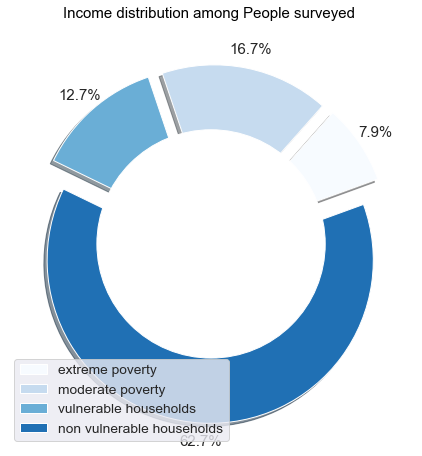

In [11]:
# Creating plots 
grouped = pd.DataFrame(data.groupby(['Target'])['r4t3'].count())
grouped.rename(columns={'r4t3':'Target_count'}, inplace=True)
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(122)
    
# Create colour palette
labels = ['extreme poverty', 'moderate poverty', 'vulnerable households', 'non vulnerable households']
theme = plt.get_cmap('Blues')
ax.set_prop_cycle("color", [theme(1. * i / len(labels))
                                 for i in range(len(labels))])
sns.set(font_scale=1.25)

# Create pie chart
pie = ax.pie(grouped['Target_count'],
                 autopct='%1.1f%%',
                 shadow=True,
                 startangle=20,
                 pctdistance=1.115,
                 explode=(0.1, 0.1, 0.1, 0.1))
   
# Turn pie chart into a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Display donut plot with legend
plt.legend(pie[0], labels, loc="lower left")
ax.set_title('Income distribution among People surveyed \n', fontsize=15)
plt.tight_layout()
plt.show()

# <a id='correlation_matrix'></a>
## 3 j. Correlation Matrix

For the correlation matrix, I'm taking all variables that are not binary (or one-hot encoded) and putting these variables into a new dataframe to find all correlations.

In [12]:
#for the correlation heatmap
non_binary_df = pd.DataFrame()
for i in X.columns:
    if max(X[i]) != 1:
        non_binary_df[i] = X[i]

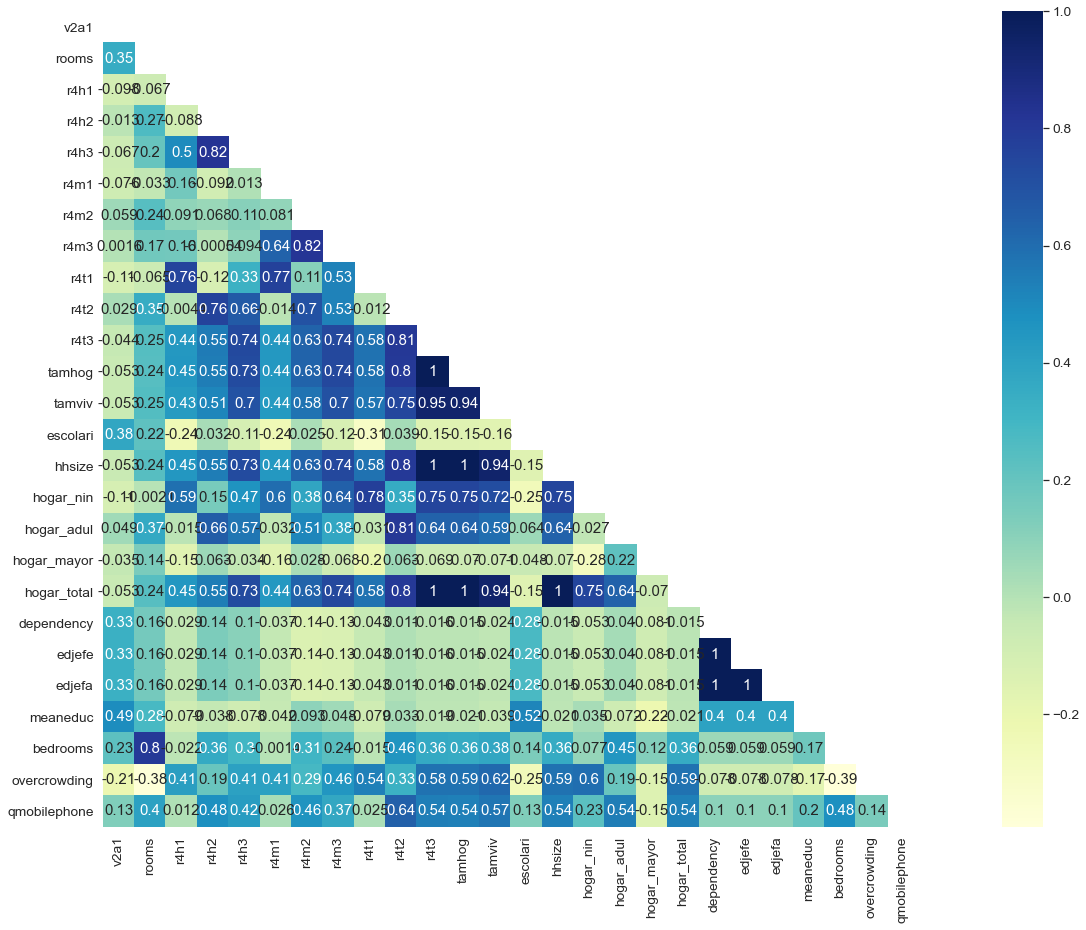

In [13]:
train_corr = non_binary_df.iloc[:,:-1]
correlations = train_corr.corr(method="pearson")
correlations
mask = np.zeros_like(correlations)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(30, 15))
    ax = sns.heatmap(correlations, mask=mask, vmax=1, square=True, cmap="YlGnBu", annot = True)

<a id='education'></a>

## 3 k. Education

The highest correlation with v2a1 (monthly rent payment) is meadeduc (average years of education for adults). Looking at the scatterplot, there seems to be a slight increase in rent as education goes up up to about 25 years of education

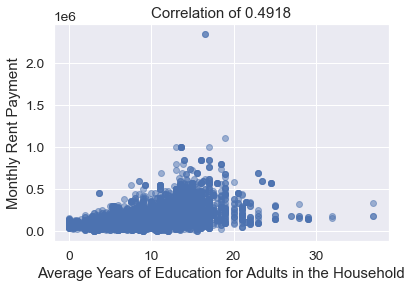

In [14]:
correlation = X["v2a1"].corr(X["meaneduc"]) 
plt.scatter(X["meaneduc"], X["v2a1"], alpha=0.5)
plt.xlabel("Average Years of Education for Adults in the Household")
plt.ylabel("Monthly Rent Payment")
plt.title("Correlation of " + str(round(correlation,4)))
plt.show()

The plot below is the same as the previous plot but only goes to a meaneducation of 25. This more clearly demonstrates a positive correlation between monthly rent payments and education level.

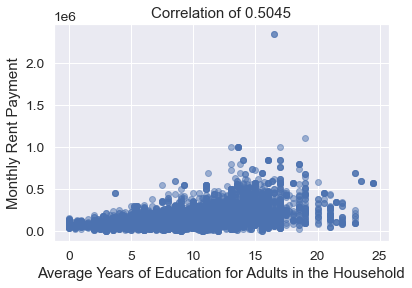

In [15]:
under_20_years_educ = X[X["meaneduc"] < 25]

correlation = under_20_years_educ["v2a1"].corr(under_20_years_educ["meaneduc"]) 
plt.scatter(under_20_years_educ["meaneduc"], under_20_years_educ["v2a1"], alpha=0.5)
plt.xlabel("Average Years of Education for Adults in the Household")
plt.ylabel("Monthly Rent Payment")
plt.title("Correlation of " + str(round(correlation,4)))
plt.show()

From the boxplots below we can see, Mean education of males and females in household is low in extreme poverty and high in non-vulnerable. The total population of male and female is also moderately high given their education in non-vulnerable income levels. 

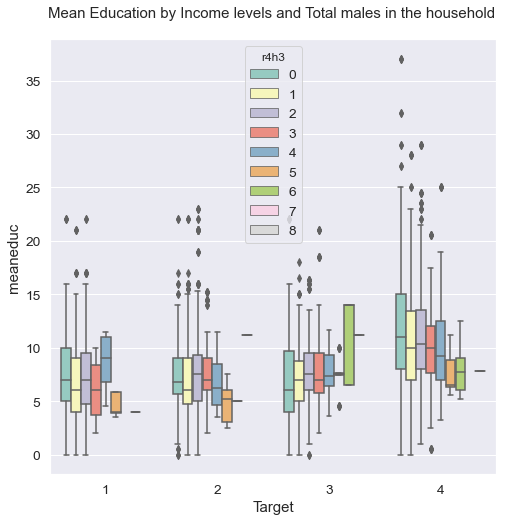

In [16]:
fig = plt.figure(figsize=(8,8))
ax = sns.boxplot(x="Target", y="meaneduc", hue='r4h3', data=data, palette="Set3").set_title('Mean Education by Income levels and Total males in the household \n')

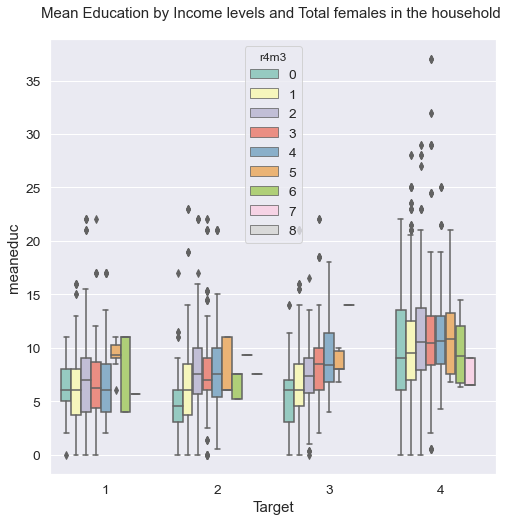

In [17]:
fig = plt.figure(figsize=(8,8))
ax = sns.boxplot(x="Target", y="meaneduc", hue='r4m3', data=data, palette="Set3").set_title('Mean Education by Income levels and Total females in the household \n')

<a id='regions'></a>

## 3 l. Regional Differences
We can look at monthly rent payment averages for the different regions. Below we see lugar1 is the most expensive while lugar6 is the least expensive. This implies lugar6 will have more impoverished people.

In [18]:
for i in range(7):
    for j in X.columns:
        if j == "lugar" + str(i):
            print("Average monthly rent payment for region lugar" +str(i),":",X.groupby('lugar'+str(i), as_index=False)['v2a1'].mean().iloc[1,1])

Average monthly rent payment for region lugar1 : 175573.08802231745
Average monthly rent payment for region lugar2 : 144905.77727614762
Average monthly rent payment for region lugar3 : 133928.95078299782
Average monthly rent payment for region lugar4 : 125144.592077539
Average monthly rent payment for region lugar5 : 121136.81493868447
Average monthly rent payment for region lugar6 : 115420.8439256377


In [19]:
warnings.filterwarnings("ignore")

regions_df = data[['lugar1','lugar2','lugar3','lugar4','lugar5','lugar6']]
regions_df['regions']='' # to create an empty column
regions_df2 = pd.get_dummies(regions_df).idxmax(1)

X["regions"] = regions_df2
 
X["regions"] = regions_df["regions"]
warnings.resetwarnings()


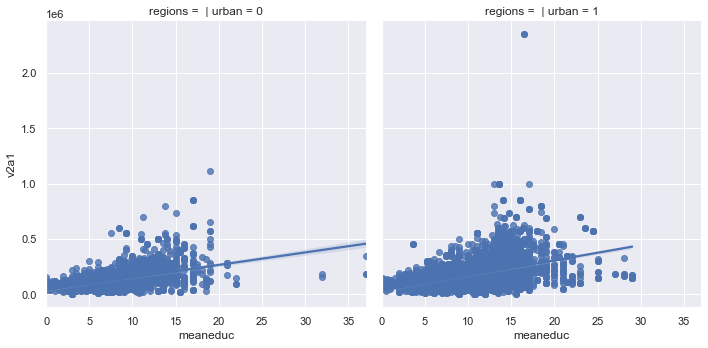

In [20]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lmplot(x="meaneduc", y="v2a1",row = "regions",col = "urban", data=X)

<a id='urban_vs_rural'></a>

## 3 m. Urban vs Rural

The urban variable may be useful in identifying target=4 ("non-vulnerable households"). There is not a significant difference in the proportion of urban vs rural for the other targets (see below for actual proportions).

[Text(0, 0, '1'), Text(0, 0, '2'), Text(0, 0, '3'), Text(0, 0, '4')]

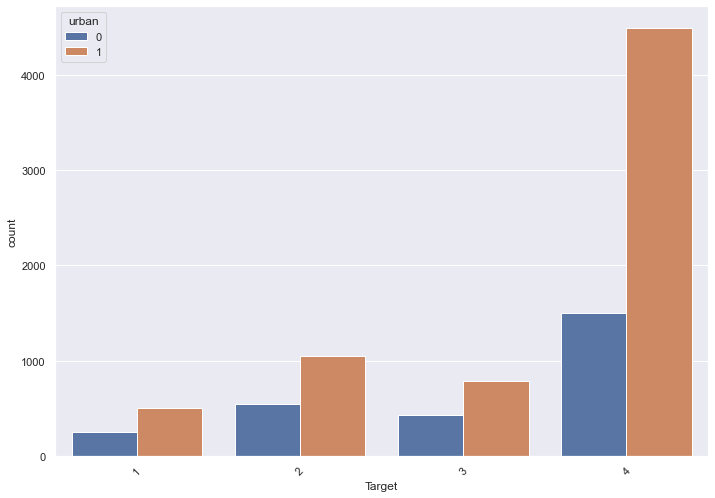

In [21]:
ax = sns.countplot(x=y,hue=X["urban"])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

In [22]:
cross_tab_urban_target = pd.crosstab(y, X["urban"], dropna=False)
props = cross_tab_urban_target[1]/(cross_tab_urban_target[0]+cross_tab_urban_target[1])
counter = 1
for i in props:
    print("Proportion of Urban dwellers in target",counter,":", i)
    counter+=1
    

Proportion of Urban dwellers in target 1 : 0.6622516556291391
Proportion of Urban dwellers in target 2 : 0.6587351283656857
Proportion of Urban dwellers in target 3 : 0.6459884201819686
Proportion of Urban dwellers in target 4 : 0.7498332221480988


<a id='gender'></a>

## 3 n. Gender Differences

For gender, 0 indicates female and 1 indicates male. Women seem to be more likely to be impoverished than men since the differences in bar sizes are greater for classes 1 and 2.

Text(0.5, 1.0, 'Gender Distribution for Each Income Level')

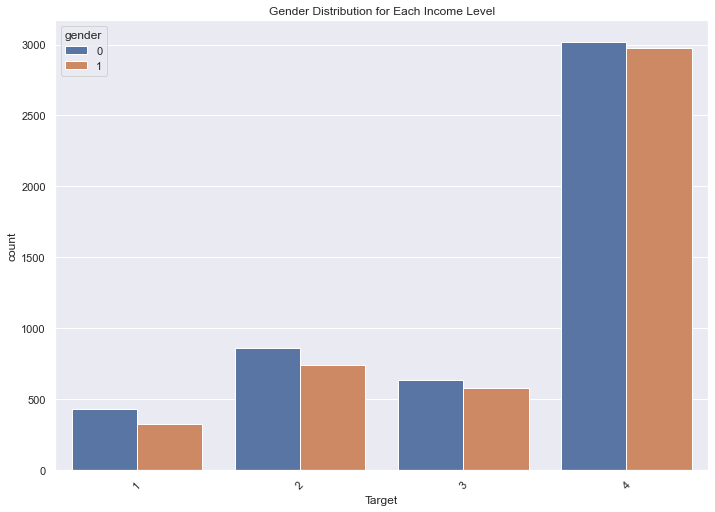

In [23]:
ax = sns.countplot(x=y,hue=X["gender"])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.set_title("Gender Distribution for Each Income Level")

<a id='overcrowding'></a>

## 3 o. Overcrowding

It is difficult to distinguish differences in overcrowding with the countplot below. However, when we calculate the proportion of homes with overcrowding for each target, we can see that lower income households have higher levels of overcrowding (7.5% for the most impoverished class compared to <1% for the least impoverished class)

Text(0.5, 1.0, 'Overcrowding of Rooms for Each Income Level')

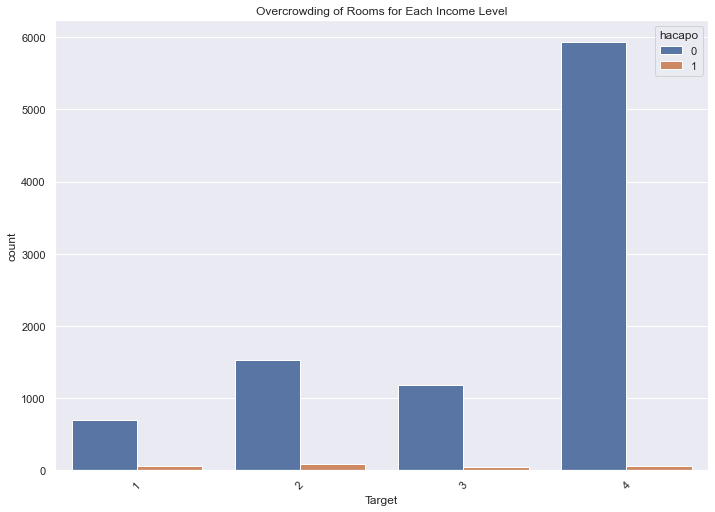

In [24]:
ax = sns.countplot(x=y,hue=X["hacapo"])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.set_title("Overcrowding of Rooms for Each Income Level")

In [25]:
cross_tab_overcrowding_target = pd.crosstab(y, X["hacapo"], dropna=False)
props = cross_tab_overcrowding_target[1]/(cross_tab_overcrowding_target[0]+cross_tab_overcrowding_target[1])
counter = 1
for i in props:
    print("Proportion of overcrowding in target",counter,":", i)
    counter+=1
    

Proportion of overcrowding in target 1 : 0.07549668874172186
Proportion of overcrowding in target 2 : 0.047589229805886035
Proportion of overcrowding in target 3 : 0.030603804797353185
Proportion of overcrowding in target 4 : 0.009339559706470981


<a id='house_quality'></a>

## 3 p. Distribution of Feature Engineered House Quality Variables

The bar charts below demonstrate that the quality of the house is a strong predictor of the level of poverty.

Text(0.5, 1.0, 'Count of Homes with Either a Poor Quality Wall, Roof or Floor for Each Income Level')

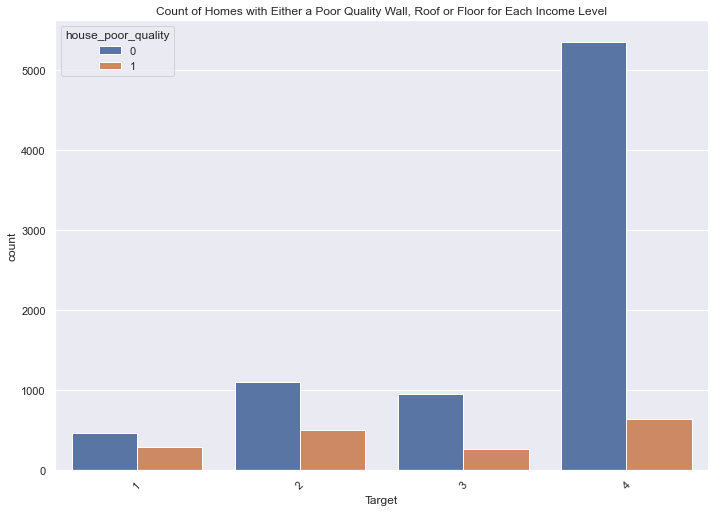

In [26]:
ax = sns.countplot(x=y,hue=X.house_poor_quality)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.set_title("Count of Homes with Either a Poor Quality Wall, Roof or Floor for Each Income Level")

In [27]:
cross_tab_house_quality_target = pd.crosstab(y, X.house_poor_quality, dropna=False)
props = cross_tab_house_quality_target[1]/(cross_tab_house_quality_target[0]+cross_tab_house_quality_target[1])
counter = 1
for i in props:
    print("Proportion poor house quality in each target",counter,":", i)
    counter+=1

Proportion poor house quality in each target 1 : 0.38145695364238413
Proportion poor house quality in each target 2 : 0.3149655604257984
Proportion poor house quality in each target 3 : 0.21836228287841192
Proportion poor house quality in each target 4 : 0.10707138092061375


Text(0.5, 1.0, 'Count of Homes with Either a Poor Quality Wall, Roof or Floor for Each Income Level')

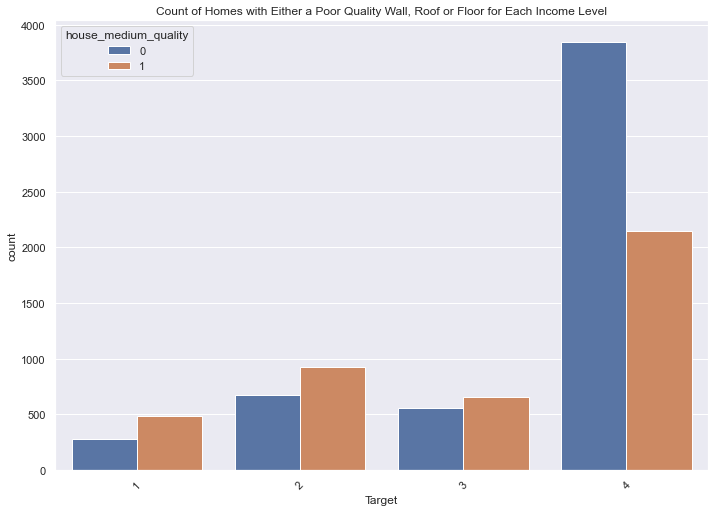

In [28]:
ax = sns.countplot(x=y,hue=X.house_medium_quality)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.set_title("Count of Homes with Either a Poor Quality Wall, Roof or Floor for Each Income Level")

In [29]:
cross_tab_house_medium_quality_target = pd.crosstab(y, X.house_medium_quality, dropna=False)
props = cross_tab_house_medium_quality_target[1]/(cross_tab_house_medium_quality_target[0]+cross_tab_house_medium_quality_target[1])
counter = 1
for i in props:
    print("Proportion medium house quality in each target",counter,":", i)
    counter+=1

Proportion medium house quality in each target 1 : 0.6384105960264901
Proportion medium house quality in each target 2 : 0.577958672510958
Proportion medium house quality in each target 3 : 0.5392886683209264
Proportion medium house quality in each target 4 : 0.35823882588392264


Text(0.5, 1.0, 'Count of Homes with Either a Good Quality Wall, Roof or Floor for Each Income Level')

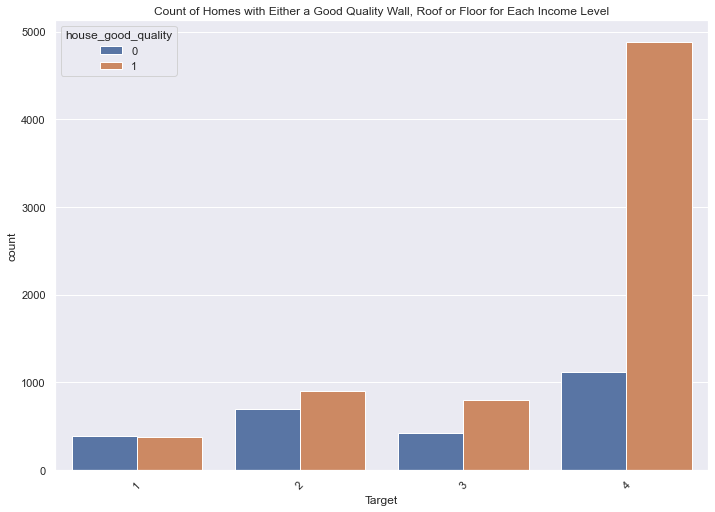

In [30]:
ax = sns.countplot(x=y,hue=X.house_good_quality)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.set_title("Count of Homes with Either a Good Quality Wall, Roof or Floor for Each Income Level")

In [31]:
cross_tab_house_good_quality_target = pd.crosstab(y, X.house_good_quality, dropna=False)
props = cross_tab_house_good_quality_target[1]/(cross_tab_house_good_quality_target[0]+cross_tab_house_good_quality_target[1])
counter = 1
for i in props:
    print("Proportion good house quality in each target",counter,":", i)
    counter+=1

Proportion good house quality in each target 1 : 0.4900662251655629
Proportion good house quality in each target 2 : 0.5623043206011271
Proportion good house quality in each target 3 : 0.6550868486352357
Proportion good house quality in each target 4 : 0.8145430286857905


<a id='dependency'></a>

## 3 q. Dependency

The graph shows the distribution of dependency colored by the value of the Target. We can see that there isn’t a significant difference in the variable distribution depending on the household poverty level.
The rate is higher for non-vulnerable and vulnerable.


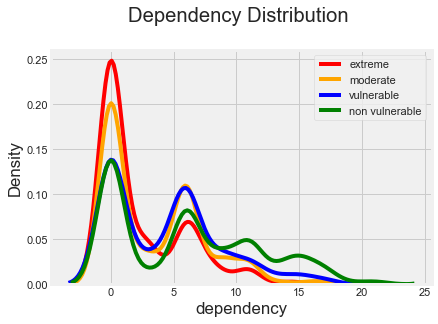

In [32]:
plt.figure(figsize = (15, 8))
plt.style.use('fivethirtyeight')

# Color mapping
colors = OrderedDict({1: 'red', 2: 'orange', 3: 'blue', 4: 'green'})
poverty_mapping = OrderedDict({1: 'extreme', 2: 'moderate', 3: 'vulnerable', 4: 'non vulnerable'})

# For Dependency column plot against the density
for i, col in enumerate(['dependency']):
    ax = plt.subplot(4, 2, i + 1)
    # Iterate through the poverty levels
    for poverty_level, color in colors.items():
        # Plot each poverty level as a separate line
        sns.kdeplot(data.loc[data['Target'] == poverty_level, col].dropna(), 
                    ax = ax, color = color, label = poverty_mapping[poverty_level])
        
    plt.title(f'Dependency Distribution \n'); plt.xlabel(f'dependency'); plt.ylabel('Density')
plt.subplots_adjust(top = 2)

<a id='age'></a>

## 3 r. Age


Most of the population lies within the age group of 20 years to 60 years.
For every age group, non vulnerable class is exceeding in numbers
Moderate poverty came in second place


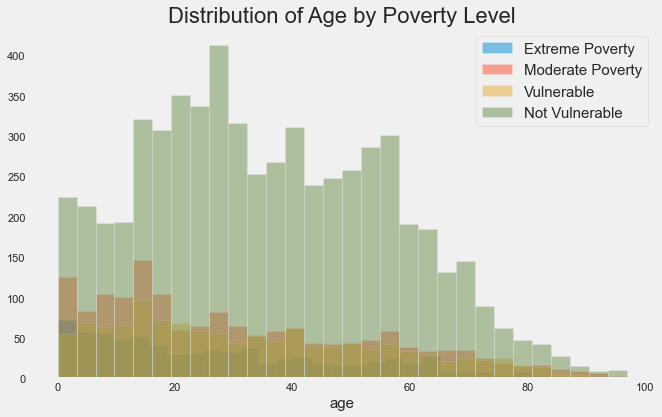

In [33]:
plt.figure(figsize=(10,6))
plt.hist(X["age"].loc[y == 1], bins = 30, alpha = 0.5, label = "Extreme Poverty")
plt.hist(X["age"].loc[y == 2], bins = 30, alpha = 0.5, label = "Moderate Poverty")
plt.hist(X["age"].loc[y == 3], bins = 30, alpha = 0.5, label = "Vulnerable")
plt.hist(X["age"].loc[y == 4], bins = 30, alpha = 0.5, label = "Not Vulnerable")
plt.title("Distribution of Age by Poverty Level", fontsize = 22)
plt.xlabel('age', fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.grid()
plt.show()

<a id='rent'></a>

## 3 s. Monthly Rent Payment Distribution

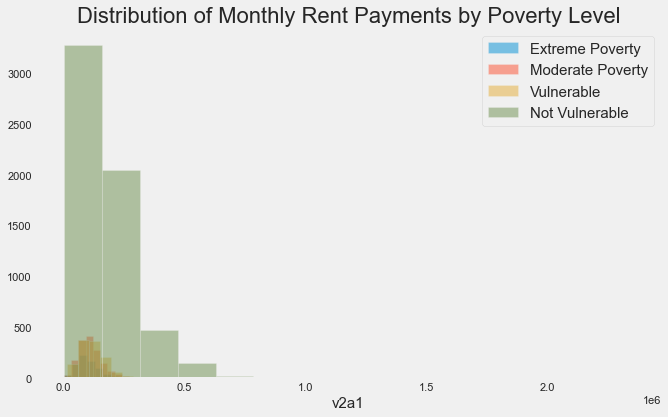

In [34]:
plt.figure(figsize=(10,6))
plt.hist(X["v2a1"].loc[y == 1], bins = 15, alpha = 0.5, label = "Extreme Poverty")
plt.hist(X["v2a1"].loc[y == 2], bins = 15, alpha = 0.5, label = "Moderate Poverty")
plt.hist(X["v2a1"].loc[y == 3], bins = 15, alpha = 0.5, label = "Vulnerable")
plt.hist(X["v2a1"].loc[y == 4], bins = 15, alpha = 0.5, label = "Not Vulnerable")
plt.title("Distribution of Monthly Rent Payments by Poverty Level", fontsize = 22)
plt.xlabel('v2a1', fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.grid()
plt.show()

<a id='missing_rent'></a>

## 3 t. Missing Rent Value Distribution

Text(0.5, 1.0, 'Missing Rent Distribution for Each Income Level')

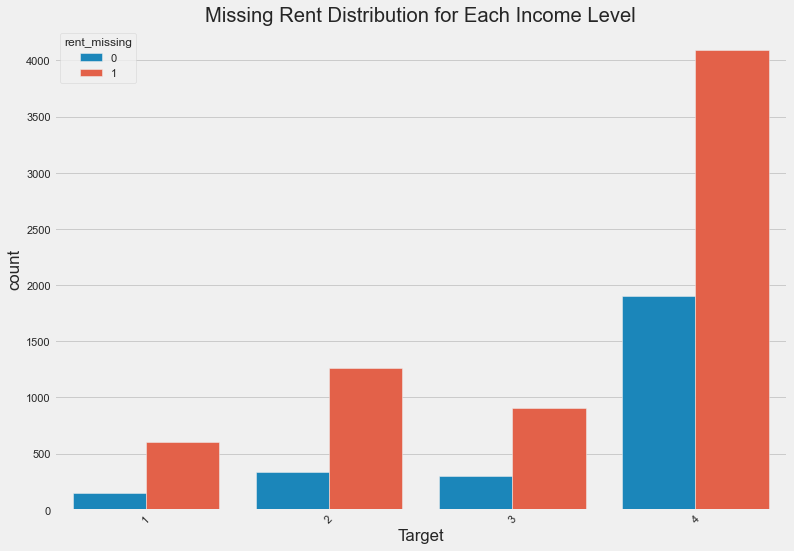

In [35]:
ax = sns.countplot(x=y,hue=X["rent_missing"])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
ax.set_title("Missing Rent Distribution for Each Income Level")

In [36]:
X = X.drop(columns=['epared1'])
X = X.drop(columns=['etecho1'])
X = X.drop(columns=['eviv1'])
X = X.drop(columns=['epared2'])
X = X.drop(columns=['etecho2'])
X = X.drop(columns=['eviv2'])
X = X.drop(columns=['epared3'])
X = X.drop(columns=['etecho3'])
X = X.drop(columns=['eviv3'])

<a id='pca'></a>
# 4. Data Reduction Techniques (PCA, KPCA & Feature Selection)
We scaled the data and performed PCA (including the number of components that captured 95% of the explainable variance).

## 4 a. PCA


In [37]:
X = X.drop(columns=['regions'])
standard_scaler = preprocessing.StandardScaler().fit_transform(X.values)

In [38]:
pca = PCA()
pca_components = pca.fit_transform(standard_scaler)

In [39]:
#determine how many components to keep
counter = 0
ratio = 0
for i in range(len(pca.explained_variance_ratio_)):
    if ratio < 0.95:
        ratio += pca.explained_variance_ratio_[i]
        counter +=1
    else:
        break
print(counter)

77


In [40]:
print(f'Explained Variance: {round(sum(PCA(n_components=counter).fit(pca_components).explained_variance_ratio_), 2)}%')

Explained Variance: 0.95%


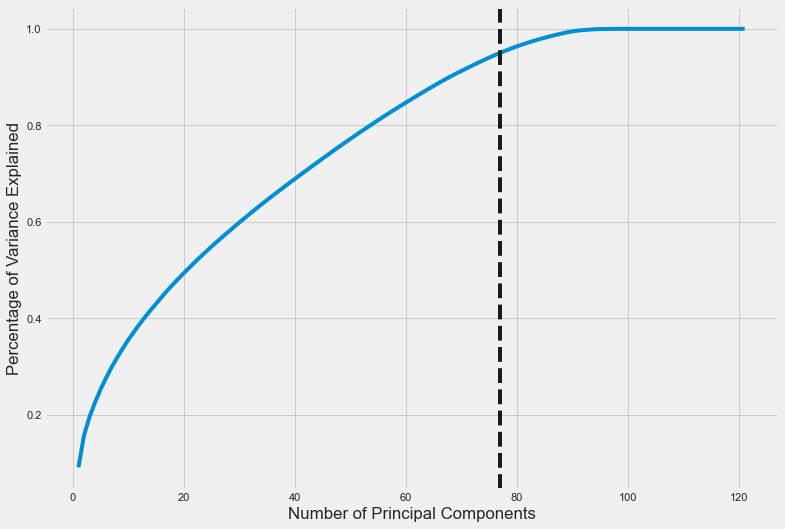

In [41]:
#PCA Visualization
num_vars = len(pca.explained_variance_ratio_)
fig = plt.figure()
ax = plt.axes()
x = np.linspace(1, 121, 121)
y_pca = np.cumsum(pca.explained_variance_ratio_)
ax.plot(x, y_pca)
plt.ylabel('Percentage of Variance Explained')
plt.xlabel('Number of Principal Components')
plt.axvline(x=counter,color='k', linestyle='--')
plt.show();

In [42]:
pca = PCA(n_components=counter)
features_norm_pca = pca.fit_transform(standard_scaler)

<a id='kpca'></a>
## 4 b. Kernel PCA

In [43]:
kpca = KernelPCA()
kpca_components = kpca.fit_transform(standard_scaler)

In [44]:
explained_variance = np.var(kpca_components, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)

In [45]:
#determine how many components to keep
counter = 0
ratio = 0
for i in range(len(explained_variance_ratio)):
    if ratio < 0.95:
        ratio += explained_variance_ratio[i]
        counter +=1
    else:
        break
print("95% of the explainable variance is captured in KPCA when", counter,"components are included")

95% of the explainable variance is captured in KPCA when 77 components are included


In [46]:
kpca = KernelPCA(n_components=counter, kernel='rbf', n_jobs=-1, remove_zero_eig=True)
kpca_components = kpca.fit_transform(standard_scaler)

We can test a model using KPCA components to determine the effectiveness of this data reduction strategy for this data. We will use the 

In [47]:
X_train_kpca, X_val_kpca, y_train_kpca, y_val_kpca = train_test_split(kpca_components, y, test_size=0.30, random_state=2020)
lr_kpca = LogisticRegression(max_iter = 10000, solver='lbfgs', penalty='l2', C=0.1,multi_class="multinomial")
lr_kpca.fit(X_train_kpca,y_train_kpca)
log_reg_pred_train_kpca = lr_kpca.predict(X_train_kpca)

log_reg_pred_test_kpca = lr_kpca.predict(X_val_kpca)
print("Logistic regression with KPCA training set accuracy:",round(metrics.accuracy_score(y_true = y_train_kpca, y_pred = log_reg_pred_train_kpca),4))
print("Logistic regression with KPCA testing set accuracy:",round(metrics.accuracy_score(y_true = y_val_kpca, y_pred = log_reg_pred_test_kpca),4))

Logistic regression with KPCA training set accuracy: 0.6436
Logistic regression with KPCA testing set accuracy: 0.6492


In [48]:
print(classification_report(y_train_kpca, log_reg_pred_train_kpca, target_names=["Extreme Poverty","Moderate Poverty","Vulnerable","Not Vulnerable"]))
print("Validation set classification report:")
print(classification_report(y_val_kpca, log_reg_pred_test_kpca, target_names=["Extreme Poverty","Moderate Poverty","Vulnerable","Not Vulnerable"]))

                  precision    recall  f1-score   support

 Extreme Poverty       0.00      0.00      0.00       548
Moderate Poverty       0.41      0.15      0.22      1115
      Vulnerable       0.00      0.00      0.00       841
  Not Vulnerable       0.66      0.99      0.79      4185

        accuracy                           0.64      6689
       macro avg       0.27      0.28      0.25      6689
    weighted avg       0.48      0.64      0.53      6689

Validation set classification report:
                  precision    recall  f1-score   support

 Extreme Poverty       0.00      0.00      0.00       207
Moderate Poverty       0.42      0.14      0.21       482
      Vulnerable       0.00      0.00      0.00       368
  Not Vulnerable       0.66      0.99      0.79      1811

        accuracy                           0.65      2868
       macro avg       0.27      0.28      0.25      2868
    weighted avg       0.49      0.65      0.54      2868



/Users/andrewschiek/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


As we will see later, KPCA has very similar results compared to PCA. Given the similarities, rather than doing both PCA and KPCA for each model we will focus our analysis on PCA.





<a id='feature_selection'></a>
## 4 c. Feature Selection Using Feature Importance From a Logistic Regression Model

Using logistic regression, we can take *all* standardized features, split these features into train and test sets, then rank those features based on the values of the calculated coefficients. (As a note we tried multiple numbers of features to include and 75-80 seems to be ideal. This is also approximately the number of components PCA calculates to capture 95% of variance). This further indicates that for optimal performance, we need to include around 75-80 features regardless of data reduction strategy.

In [49]:
X_train_fs, X_val_fs, y_train_fs, y_val_fs = train_test_split(standard_scaler, y, test_size=0.30, random_state=2020)

lr_fs = LogisticRegression(max_iter = 10000, solver='lbfgs', penalty='l2', C=0.1,multi_class="multinomial")
lr_fs.fit(X_train_fs,y_train_fs)
log_reg_pred_train_fs = lr_fs.predict(X_train_fs)

log_reg_pred_test_fs = lr_fs.predict(X_val_fs)
print("Logistic regression training set accuracy:",round(metrics.accuracy_score(y_true = y_train_fs, y_pred = log_reg_pred_train_fs),4))
print("Logistic regression testing set accuracy:",round(metrics.accuracy_score(y_true = y_val_fs, y_pred = log_reg_pred_test_fs),4))

Logistic regression training set accuracy: 0.6956
Logistic regression testing set accuracy: 0.6817


In [50]:
selector = RFE(lr_fs, 10)
selector = selector.fit(X_train_fs, y_train_fs)

/Users/andrewschiek/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [51]:
order = selector.ranking_
feature_ranks = []
for i in range(len(order)):
  if order[i] < 70:
    feature_ranks.append(X.columns[i])
print("Number of features included:", len(feature_ranks))

Number of features included: 78


<a id='research_questions'></a>
# 5. Research Questions

<a id='research_question_1'></a>
#Research Question 1: Can we use PCA to identify the main components that determine poverty level?

As discussed earlier, we used PCA to identify the components that make up 95% of the explained variance. To determine variables that were important in the construction of the principal components, we can look at loading scores which are coefficients of the linear combination of the scaled attributes. Loading scores were moderately low, so we can say scores with absolute values of 0.15 indicate the attribute was important for that components. Below are the features with high loading scores for the first 3 components and their associated group as designated by the data dictionary built earlier

**PC1**

* **r4h3**: Features Describing Number of People Living in the Household
* **r4m2**: Features Describing Number of People Living in the Household
* **r4m3**: Features Describing Number of People Living in the Household
* **r4t1**: Features Describing Number of People Living in the Household
* **r4t2**: Features Describing Number of People Living in the Household
* **r4t3**: Features Describing Number of People Living in the Household
* **tamviv**: Features Describing Number of People Living in the Household
* **tamhog**: Variables Related to House Size
* **hhsize**: Variables Related to House Size
* **hogar_adul**: Features Describing Number of Individuals Living in Household (Within Different Age Groups)
* **hogar_total**: Features Describing Number of Individuals Living in Household (Within Different Age Groups)

**PC2**

* **v2a1**: Monthly Rent Payment
* **paredblolad**: Variables Describing Materials of Wall, Floor, or Roof
* **pisomoscer**: Variables Describing Materials of Wall, Floor, or Roof
* **pisocemento**: Variables Describing Materials of Wall, Floor, or Roof
* **cielorazo**: Variables Describing Materials of Wall, Floor, or Roof

* **escolari**: Features Describing Education Level of Head of Household & Members of the Household
* **edjefe** Features Describing Education Level of Head of Household & Members of the Household
* **edjefa** Features Describing Education Level of Head of Household & Members of the Household
* **meaneduc**: Features Describing Education Level of Head of Household & Members of the Household
* **elimbasu1**: Features Describing How Trash is Disposed
* **dependency**: Features Describing Number of Individuals Living in Household (Within Different Age Groups)

* **qmobilephone**: Features Indicating Types of Technology Owned
* **lugar1**: Features Describing Region Household is Located
* **house_good_quality**: Variables Describing Quality of House (Good,Avg,Poor)
* **bedrooms**: Features Describing Number of Rooms the Household Has
* **rooms**: Features Describing Number of Rooms the Household Has

**PC3**
* **r4h1**: Features Describing Number of People Living in the Household
* **r4h2**: Features Describing Number of People Living in the Household
* **r4m1**: Features Describing Number of People Living in the Household
* **r4t1**: Features Describing Number of People Living in the Household
* **r4t2**: Features Describing Number of People Living in the Household
* **estadocivil1**: Features Describing Status of Head of Household
* **hogar_nin**: Features Describing Number of Individuals Living in Household (Within Different Age Groups)
* **hogar_adul**: Features Describing Number of Individuals Living in Household (Within Different Age Groups)
* **hogar_mayor**: Features Describing Number of Individuals Living in Household (Within Different Age Groups)
* **instlevel1**: Features Describing Education Level of Head of Household & Members of the Household
* **bedrooms**: Features Describing Number of Rooms the Household Has
* **tipovivi1**: Features Decribing Rent/Mortgage Payment
* **tipovivi3**: Features Decribing Rent/Mortgage Payment
* **rent_missing**: Features Decribing Rent/Mortgage Payment

**Analysis of loadings**:

Based on these results, Principal Component 1 is built almost entirely from features describing the size of the household (# of people and physical size). The expectation is that these would be good variables for distinguishing poverty level: wealthier people will generally have larger homes. We may also expect poorer people to fit more people into a single home than a wealthier house would.

Principal Component 2 has mostly variables describing the house materials, education level of people in the house, as well as the region and if the overall house quality is good. Lugar1 is the region with the highest average rent payments, and the variable indicating if the house quality is good would be best at identifying more afflued households. Therefore, *the features that build PC2 are better at identifying less vulnerable households.* 

Principal Component 3 Is similar to principal component 1 but had a strong loading from the "rent_missing" attribute. The presumption is that poorer households have more difficulty in providing records regarding finances (e.g. rent), so missing values for rent may be an indicator for more impoverished household. There, *the features that build PC3 are better at identifying more vulnerable households.*



In [52]:
pca_find_vars = PCA(n_components=3)
pca_find_vars.fit_transform(standard_scaler)
print(pd.DataFrame(pca_find_vars.components_,columns=X.columns,index = ['PC-1','PC-2', 'PC-3']))

          v2a1    hacdor     rooms    hacapo      v14a    refrig      v18q  \
PC-1 -0.051469  0.123422  0.029954  0.120433 -0.011265 -0.025513 -0.022883   
PC-2 -0.185986  0.070691 -0.221362  0.061352 -0.053974 -0.092117 -0.143884   
PC-3 -0.035367 -0.079760  0.129118 -0.042672  0.029424 -0.021013 -0.072258   

          r4h1      r4h2      r4h3      r4m1      r4m2      r4m3      r4t1  \
PC-1  0.147826  0.141471  0.208000  0.146546  0.170317  0.215883  0.192938   
PC-2  0.046006 -0.102339 -0.062886  0.033004 -0.106402 -0.063361  0.051715   
PC-3 -0.151180  0.229357  0.113408 -0.192384  0.064993 -0.060171 -0.225418   

          r4t2      r4t3    tamhog    tamviv  escolari    hhsize  paredblolad  \
PC-1  0.212048  0.286627  0.286751  0.279567 -0.093752  0.286751    -0.056470   
PC-2 -0.142513 -0.085358 -0.084260 -0.075735 -0.180779 -0.084260    -0.177138   
PC-3  0.207071  0.035145  0.034000  0.026921  0.076417  0.034000    -0.040794   

      paredzocalo  paredpreb  pareddes  paredmad 

**PCA & Feature Importance**

Additionally, we can supplement this principal component analysis with the feature importance rankings determined by the logistic regression used earlier (top 10 below). All but two were strong contributors to the first 3 principal components, indicating that these features are strong predictors of poverty

**v2a1** --> PC2

**v18q** --> Not in first 3 PCs

**r4t2** --> PC1 & PC2

**tamviv** --> PC1

**coopele** --> Not in first 3 PCs

**hogar_nin** --> PC3

**hogar_adul** --> PC3

**edjefa** --> PC2

**meaneduc** --> PC2

**qmobilephone** --> PC2

In [53]:
for i in range(len(order)):
  if order[i] == 1:
    print(X.columns[i])

v2a1
v18q
r4t2
tamviv
coopele
hogar_nin
hogar_adul
edjefa
meaneduc
qmobilephone


<a id='research_question_2'></a>

#Research Question 2: Can we develop a model better than our baseline model?

We decided to use a K-Nearest Neighbors algorithm to act as a baseline model. Given the imbalanced nature of the data, a KNN algorithm should fair well even without any hyperparameter tuning. The baseline model uses no data transformation (scaling, data reduction, resampling, etc).

In [54]:
X_train_base, X_val_base, y_train_base, y_val_base = train_test_split(X, y, test_size=0.30, random_state=2020)

In [55]:
clf_knn_base = KNeighborsClassifier()
clf_knn_base.fit(X_train_base, y_train_base)
KNN_base_fit_train = clf_knn_base.predict(X_train_base)
KNN_base_fit_val = clf_knn_base.predict(X_val_base)
print("Training set classification report:")
print(classification_report(y_train_base, KNN_base_fit_train, target_names=["Extreme Poverty","Moderate Poverty","Vulnerable","Not Vulnerable"]))
print("Validation set classification report:")
print(classification_report(y_val_base, KNN_base_fit_val, target_names=["Extreme Poverty","Moderate Poverty","Vulnerable","Not Vulnerable"]))

Training set classification report:
                  precision    recall  f1-score   support

 Extreme Poverty       0.52      0.43      0.47       548
Moderate Poverty       0.55      0.51      0.53      1115
      Vulnerable       0.51      0.37      0.43       841
  Not Vulnerable       0.80      0.87      0.83      4185

        accuracy                           0.71      6689
       macro avg       0.59      0.55      0.56      6689
    weighted avg       0.70      0.71      0.70      6689

Validation set classification report:
                  precision    recall  f1-score   support

 Extreme Poverty       0.27      0.24      0.26       207
Moderate Poverty       0.31      0.29      0.30       482
      Vulnerable       0.22      0.14      0.17       368
  Not Vulnerable       0.73      0.80      0.76      1811

        accuracy                           0.59      2868
       macro avg       0.38      0.37      0.37      2868
    weighted avg       0.56      0.59      0.57    

There is a pretty striking difference in results between the training set and test set for the KNN model (overfitting). The baseline model indicates that the data to provide some predictive power, and we will investigate many algorithms to determine which is best at solving our problem.

<a id='research_question_3'></a>

#Research Question 3: How important are regional differences?

To understand the generalizability of the models we develop, we should understand regional differences in our data and see if predictive modeling is similar regardless of region.

First we compared identified general differences between regions based on the rent variable. We can see that Lugar1 pays the most rent while Lugar6 pays the least (on average).

In [56]:
for i in range(7):
    for j in X.columns:
        if j == "lugar" + str(i):
            print("Average monthly rent payment for region lugar" +str(i),":",X.groupby('lugar'+str(i), as_index=False)['v2a1'].mean().iloc[1,1])

Average monthly rent payment for region lugar1 : 175573.08802231745
Average monthly rent payment for region lugar2 : 144905.77727614762
Average monthly rent payment for region lugar3 : 133928.95078299782
Average monthly rent payment for region lugar4 : 125144.592077539
Average monthly rent payment for region lugar5 : 121136.81493868447
Average monthly rent payment for region lugar6 : 115420.8439256377


More than half of all observations come from lugar1. We will build a logistic regression model with default parameters for two subsets of the data: 1 for observations in lugar1 and another for observations not in lugar1. We will also scale the attributes.

In [57]:
X_lugar_data = X
X_lugar_data["target"] = y

X_lugar1 = X_lugar_data[X_lugar_data["lugar1"]==1]
X_lugar_other = X_lugar_data[(X_lugar_data["lugar6"]==1) | (X_lugar_data["lugar5"]==1) | (X_lugar_data["lugar4"]==1) | (X_lugar_data["lugar3"]==1)]
print("Number of households in lugar1:",X_lugar1.shape[0])
print("Number of households not it lugar 1:", X_lugar_other.shape[0])

Number of households in lugar1: 5616
Number of households not it lugar 1: 3055


In [58]:
y_lugar1 = X_lugar1["target"]
y_lugar_other = X_lugar_other["target"]
X_lugar1 = X_lugar1.drop(columns=['target'])
X_lugar_other = X_lugar_other.drop(columns=['target'])



In [59]:
standard_scaler_lugar1 = preprocessing.StandardScaler().fit_transform(X_lugar1.values)
standard_scaler_lugar_other = preprocessing.StandardScaler().fit_transform(X_lugar_other.values)
X_train_lugar1, X_val_lugar1, y_train_lugar1, y_val_lugar1 = train_test_split(standard_scaler_lugar1, y_lugar1, test_size=0.30, random_state=2020)
X_train_lugar_other, X_val_lugar_other, y_train_lugar_other, y_val_lugar_other = train_test_split(standard_scaler_lugar_other, y_lugar_other, test_size=0.30, random_state=2020)


In [60]:
lr_lugar1 = LogisticRegression(max_iter = 10000,multi_class="multinomial")
lr_lugar1.fit(X_train_lugar1,y_train_lugar1)
log_reg_pred_train_lugar1 = lr_lugar1.predict(X_train_lugar1)

log_reg_pred_test_lugar1 = lr_lugar1.predict(X_val_lugar1)
print("Logistic regression training set accuracy for Lugar 1:",round(metrics.accuracy_score(y_true = y_train_lugar1, y_pred = log_reg_pred_train_lugar1),4))
print("Logistic regression testing set accuracy for Lugar 1:",round(metrics.accuracy_score(y_true = y_val_lugar1, y_pred = log_reg_pred_test_lugar1),4))

Logistic regression training set accuracy for Lugar 1: 0.7593
Logistic regression testing set accuracy for Lugar 1: 0.7573


In [61]:

print(classification_report(y_train_lugar1, log_reg_pred_train_lugar1, target_names=["Extreme Poverty","Moderate Poverty","Vulnerable","Not Vulnerable"]))
print("Validation set classification report:")
print(classification_report(y_val_lugar1, log_reg_pred_test_lugar1, target_names=["Extreme Poverty","Moderate Poverty","Vulnerable","Not Vulnerable"]))


                  precision    recall  f1-score   support

 Extreme Poverty       0.75      0.45      0.57       218
Moderate Poverty       0.53      0.36      0.43       533
      Vulnerable       0.50      0.22      0.31       456
  Not Vulnerable       0.80      0.95      0.87      2724

        accuracy                           0.76      3931
       macro avg       0.64      0.50      0.54      3931
    weighted avg       0.73      0.76      0.73      3931

Validation set classification report:
                  precision    recall  f1-score   support

 Extreme Poverty       0.59      0.37      0.46       107
Moderate Poverty       0.45      0.33      0.38       219
      Vulnerable       0.40      0.17      0.24       160
  Not Vulnerable       0.82      0.95      0.88      1199

        accuracy                           0.76      1685
       macro avg       0.57      0.45      0.49      1685
    weighted avg       0.72      0.76      0.73      1685



In [62]:
lr_lugar_other = LogisticRegression(max_iter = 10000,multi_class="multinomial")
lr_lugar_other.fit(X_train_lugar_other,y_train_lugar_other)
log_reg_pred_train_lugar_other = lr_lugar_other.predict(X_train_lugar_other)

log_reg_pred_test_lugar_other = lr_lugar_other.predict(X_val_lugar_other)
print("Logistic regression training set accuracy for regions not in Lugar 1:",round(metrics.accuracy_score(y_true = y_train_lugar_other, y_pred = log_reg_pred_train_lugar_other),4))
print("Logistic regression testing set accuracy for regions not in Lugar 1:",round(metrics.accuracy_score(y_true = y_val_lugar_other, y_pred = log_reg_pred_test_lugar_other),4))

Logistic regression training set accuracy for regions not in Lugar 1: 0.6614
Logistic regression testing set accuracy for regions not in Lugar 1: 0.5998


In [63]:
print(classification_report(y_train_lugar_other, log_reg_pred_train_lugar_other, target_names=["Extreme Poverty","Moderate Poverty","Vulnerable","Not Vulnerable"]))
print("Validation set classification report:")
print(classification_report(y_val_lugar_other, log_reg_pred_test_lugar_other, target_names=["Extreme Poverty","Moderate Poverty","Vulnerable","Not Vulnerable"]))

                  precision    recall  f1-score   support

 Extreme Poverty       0.58      0.44      0.50       231
Moderate Poverty       0.55      0.52      0.53       480
      Vulnerable       0.55      0.29      0.38       332
  Not Vulnerable       0.73      0.88      0.80      1095

        accuracy                           0.66      2138
       macro avg       0.60      0.53      0.55      2138
    weighted avg       0.64      0.66      0.64      2138

Validation set classification report:
                  precision    recall  f1-score   support

 Extreme Poverty       0.54      0.34      0.42       122
Moderate Poverty       0.46      0.45      0.45       204
      Vulnerable       0.41      0.19      0.26       144
  Not Vulnerable       0.68      0.87      0.76       447

        accuracy                           0.60       917
       macro avg       0.52      0.46      0.47       917
    weighted avg       0.57      0.60      0.57       917



Interestingly, the logistic regression models perform better on both subsets of the data compared to when the entire data is used (as we will see later). This indicates that models may be better applied on more homogeneous groups than taking many groups and putting them together in a single dataset.

We are also interested in seeing differences in the region in a more general sense: rural vs urban. We can treat rural vs urban as a target variable and treat all other other variables as explanatory features. The plot below using the average education of members of the household shows that there will clearly be differences between rural and urban (urban areas have a much larger proportion of people with a mean education greater than 15)


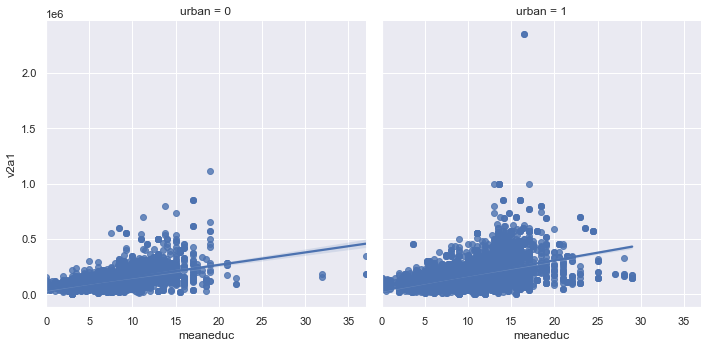

In [64]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lmplot(x="meaneduc", y="v2a1",col = "urban", data=X)

We ran our SVC and KNN classifiers trying to predict region to see if either method could identify regional differences.

In [65]:
y_reg = X["urban"]
X_train_reg, X_val_reg, y_train_reg, y_val_reg = train_test_split(standard_scaler, y_reg, test_size=0.30, random_state=2020)

In [66]:
knn_urban_rural = KNeighborsClassifier()
knn_urban_rural.fit(X_train_reg, y_train_reg)
knn_urban_rural_val_pred = knn_urban_rural.predict(X_val_reg)
print(classification_report(y_val_reg, knn_urban_rural_val_pred,target_names=["Rural","Urban"]))

              precision    recall  f1-score   support

       Rural       0.93      0.73      0.82       830
       Urban       0.90      0.98      0.94      2038

    accuracy                           0.91      2868
   macro avg       0.91      0.85      0.88      2868
weighted avg       0.91      0.91      0.90      2868



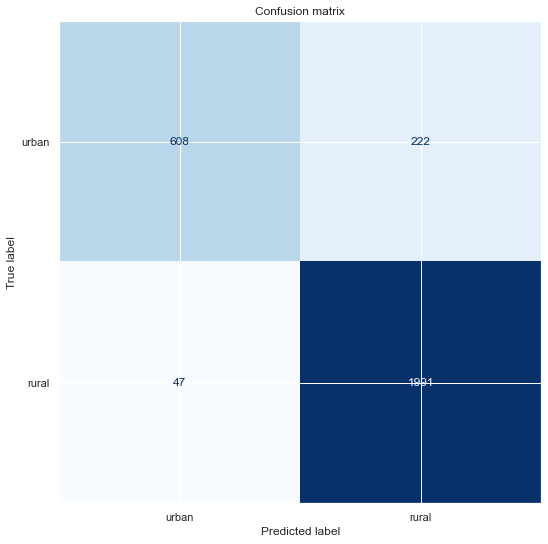

In [67]:
disp = plot_confusion_matrix(knn_urban_rural, X_val_reg, y_val_reg,
                                 display_labels=["urban", "rural"],
                                cmap=plt.cm.Blues,values_format = '')
disp.ax_.set_title("Confusion matrix")
disp.im_.colorbar.remove()
print(disp)

The confusion matrix above demonstrates that urban vs rural is much easier to predict in the data than poverty (however recall is slightly weak with many false positives, possibly due to class imbalance)

## 4. Can we build a useful model using only data on the house (traditional PMT attributes)?

Given that one of the reasons this competition was created was to see how non-traditional PMT features would help in the prediction of social welfare need, we wanted to create our own traditional PMT model as a means of comparison to models that utilize traditional and non-traditional PMT features. First we need to subset the data based on these features (as determined by our data dictionary)

In [68]:
houseFactors_subset = X.loc[:,["tamhog", "hhsize","paredblolad", "paredzocalo", "paredpreb", "pareddes" , "paredmad", "paredzinc", "paredfibras", "paredother", "pisomoscer", "pisocemento", "pisoother", "pisonatur", "pisonotiene", "pisomadera", "techozinc", "techoentrepiso", "techocane", "techootro", "cielorazo","house_poor_quality","house_medium_quality","house_good_quality","lugar1", "lugar2", "lugar3", "lugar4", "lugar5", "lugar6","urban"]]
min_max_scaler = preprocessing.MinMaxScaler().fit(houseFactors_subset.values)
features_norms = min_max_scaler.transform(houseFactors_subset.values)
X_train_PMT, X_val_PMT, y_train_PMT, y_val_PMT = train_test_split(features_norms, y, test_size=0.30, random_state=2020)

Using a train-test split of normalized PMT features, we will try two models: KNN and SVC to determine the predictive performance of these features.

**KNN with Traditional PMT Features**

In [69]:
clf = KNeighborsClassifier()
clf.fit(X_train_PMT, y_train_PMT)

KNeighborsClassifier()

In [70]:
KNN_Fit_PMT = clf.predict(X_val_PMT)
print('KNN PMT Classification Report: ')
print(classification_report(y_val_PMT, KNN_Fit_PMT, target_names=["Extreme Poverty","Moderate Poverty","Vulnerable","Not Vulnerable"]))

KNN PMT Classification Report: 
                  precision    recall  f1-score   support

 Extreme Poverty       0.52      0.55      0.53       207
Moderate Poverty       0.60      0.50      0.54       482
      Vulnerable       0.54      0.40      0.46       368
  Not Vulnerable       0.80      0.88      0.84      1811

        accuracy                           0.73      2868
       macro avg       0.62      0.58      0.59      2868
    weighted avg       0.71      0.73      0.72      2868



**SVC with Traditional PMT Features**

In [71]:
svc = SVC(kernel ='rbf', C = 20, gamma = 'scale')
svc.fit(X_train_PMT, y_train_PMT)
SVC_fit_PMT = svc.predict(X_val_PMT)
print('SVC PMT Classification Report: ')
print(classification_report(y_val_PMT, SVC_fit_PMT, target_names=["Extreme Poverty","Moderate Poverty","Vulnerable","Not Vulnerable"]))

SVC PMT Classification Report: 
                  precision    recall  f1-score   support

 Extreme Poverty       0.59      0.35      0.44       207
Moderate Poverty       0.75      0.44      0.55       482
      Vulnerable       0.57      0.34      0.42       368
  Not Vulnerable       0.76      0.94      0.84      1811

        accuracy                           0.74      2868
       macro avg       0.67      0.52      0.56      2868
    weighted avg       0.72      0.74      0.71      2868



From the above Classification Reports, performance is actually quite strong (macro F-1 Average scores of 0.4 or higher are quite good for this data). Both of these models actually do fairly well at identifying classes with fewer samples (compared to other models analyzed later with recall and f-1 scores below 0.2). We will see later that the difference in KNN is minimal while SVC has a moderate drop in performance when only using traditional PMT variables. This is likely due to the fact that the parameters that we removed were critical to the boundary and thus the preformance of the classifier.


<a id='models'></a>
# 6. Models

This section includes code for running machine learning models and hyperparameter tuning. See section 6 for experiment results.

## 6 a. Train-Test Split

Models will use the PCA components calculate earlier, which are split into train and test sets. Traditional and Non-Traditional PMT features were included for this section.

In [72]:
X_train, X_val, y_train, y_val = train_test_split(features_norm_pca, y, test_size=0.30, random_state=2020)

## 6 b. Logistic Regression
<a id='logistic_regression'></a>

We will first build a logistic regression model without gridsearch as a baseline to compare against hyperparameter tuning.

In [73]:
lr1 = LogisticRegression(max_iter = 10000,multi_class="multinomial")
lr1.fit(X_train,y_train)
log_reg_pred_train = lr1.predict(X_train)

log_reg_pred_test = lr1.predict(X_val)
print("Logistic regression training set accuracy:",round(metrics.accuracy_score(y_true = y_train, y_pred = log_reg_pred_train),4))
print("Logistic regression testing set accuracy:",round(metrics.accuracy_score(y_true = y_val, y_pred = log_reg_pred_test),4))

Logistic regression training set accuracy: 0.6834
Logistic regression testing set accuracy: 0.6691


In [74]:
def get_cv_accuracies(model_fit, n_folds = 5):
    results = model_fit.cv_results_
    accuracies_lst = []
    accuracy = 0
    for i in range(len(results["mean_fit_time"])):
        for j in range(n_folds):
            accuracy += results["split"+str(j)+"_test_score"][i]
        accuracies_lst.append(accuracy/n_folds)
        accuracy = 0
    indx = accuracies_lst.index(max(accuracies_lst))
    best_param = results['params'][indx]
    
    return best_param

Logistic regression with gridsearch cv.

In [75]:
grid={"C":np.logspace(-3,3,7)}
logreg=LogisticRegression(max_iter=10000,multi_class="multinomial",penalty= 'l2')
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)


print("Best Parameters:",get_cv_accuracies(logreg_cv))

Best Parameters: {'C': 10.0}


In [76]:
lr1 = LogisticRegression(max_iter = 10000, solver='lbfgs', penalty='l2', C=10,multi_class="multinomial")
lr1.fit(X_train,y_train)
log_reg_pred_train = lr1.predict(X_train)
log_reg_pred_test = lr1.predict(X_val)
print("Logistic regression training set accuracy:",round(metrics.accuracy_score(y_true = y_train, y_pred = log_reg_pred_train),4))
print("Logistic regression testing set accuracy:",round(metrics.accuracy_score(y_true = y_val, y_pred = log_reg_pred_test),4))

Logistic regression training set accuracy: 0.6837
Logistic regression testing set accuracy: 0.6688


# <a id='adaboost'></a>
## 6 c. AdaBoost Model

In [77]:
ac = AdaBoostClassifier()
ac.fit(X_train,y_train.ravel())

pred9 = ac.predict(X_train)
pred10 = ac.predict(X_val)

In [78]:
pred_ada_train = ac.predict(X_train) # make prediction on the training set 
pred_ada_test = ac.predict(X_val) # make prediction on the testing set 

print("The training accuacy is: ",metrics.accuracy_score(y_true = y_train, y_pred = pred_ada_train))
print("The testing accuacy is: ",metrics.accuracy_score(y_true = y_val, y_pred = pred_ada_test))

The training accuacy is:  0.6628793541635521
The testing accuacy is:  0.6398186889818689


# <a id='gnb'></a>
## 6 d. Gaussian Naive Bayes Classifier 

In [79]:
clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)

GaussianNB()

In [80]:
pred_train = clf_nb.predict(X_train)
metrics.accuracy_score(y_true = y_train, y_pred = pred_train)
print("Gaussian Naive Bayes classifier training set accuracy:",round(metrics.accuracy_score(y_true = y_train, y_pred = pred_train),4))

Gaussian Naive Bayes classifier training set accuracy: 0.5829


In [81]:
pred_nb = clf_nb.predict(X_val)
metrics.accuracy_score(y_true = y_val, y_pred = pred_nb)
print("Gaussian Naive Bayes classifier testing set accuracy:",round(metrics.accuracy_score(y_true = y_val, y_pred = pred_nb),4))

Gaussian Naive Bayes classifier testing set accuracy: 0.5694


In [82]:
param_grid = {
    'var_smoothing': [1e-11, 1e-10, 1e-09, 1e-08, 1e-07, 1e-5],
    }

grid_search = GridSearchCV(estimator = clf_nb, param_grid = param_grid, cv = 5)
grid_search.fit(features_norm_pca, y)

print(grid_search.best_params_)

{'var_smoothing': 1e-05}


In [83]:
clf_nb2 = GaussianNB(var_smoothing = 1e-11)
clf_nb2.fit(X_train, np.ravel(y_train))
NB_fit_train = clf_nb2.predict(X_train)
NB_fit_CV5 = clf_nb2.predict(X_val)

<a id='decision_tree'></a>

## 6 e. Decision Tree

In [84]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [85]:
tree_clf = DecisionTreeClassifier()

parameters = {"min_samples_split":[50,100,200],
             "max_depth":[1,5,10,50,100]}

tree_clf.fit(X_train,y_train.ravel()) # fit the model

DecisionTreeClassifier()

In [86]:
# find the best model use scoring = balanced_accuracy
grid_cv1 = GridSearchCV(estimator=tree_clf, param_grid=parameters, cv=5,scoring="balanced_accuracy") 
grid_cv1.fit(X_train,y_train.ravel()) 

print_results(grid_cv1)

BEST PARAMS: {'max_depth': 50, 'min_samples_split': 50}

0.25 (+/-0.0) for {'max_depth': 1, 'min_samples_split': 50}
0.25 (+/-0.0) for {'max_depth': 1, 'min_samples_split': 100}
0.25 (+/-0.0) for {'max_depth': 1, 'min_samples_split': 200}
0.348 (+/-0.009) for {'max_depth': 5, 'min_samples_split': 50}
0.345 (+/-0.013) for {'max_depth': 5, 'min_samples_split': 100}
0.343 (+/-0.021) for {'max_depth': 5, 'min_samples_split': 200}
0.403 (+/-0.015) for {'max_depth': 10, 'min_samples_split': 50}
0.38 (+/-0.023) for {'max_depth': 10, 'min_samples_split': 100}
0.363 (+/-0.016) for {'max_depth': 10, 'min_samples_split': 200}
0.423 (+/-0.013) for {'max_depth': 50, 'min_samples_split': 50}
0.381 (+/-0.024) for {'max_depth': 50, 'min_samples_split': 100}
0.363 (+/-0.015) for {'max_depth': 50, 'min_samples_split': 200}
0.423 (+/-0.013) for {'max_depth': 100, 'min_samples_split': 50}
0.382 (+/-0.023) for {'max_depth': 100, 'min_samples_split': 100}
0.363 (+/-0.016) for {'max_depth': 100, 'min_samples

In [87]:
# use f1_macro scoring 
grid_cv2 = GridSearchCV(estimator=tree_clf, param_grid=parameters, cv=5,scoring="f1_macro") 
grid_cv2.fit(X_train,y_train.ravel()) 

print_results(grid_cv2)

BEST PARAMS: {'max_depth': 50, 'min_samples_split': 50}

0.192 (+/-0.0) for {'max_depth': 1, 'min_samples_split': 50}
0.192 (+/-0.0) for {'max_depth': 1, 'min_samples_split': 100}
0.192 (+/-0.0) for {'max_depth': 1, 'min_samples_split': 200}
0.34 (+/-0.012) for {'max_depth': 5, 'min_samples_split': 50}
0.338 (+/-0.013) for {'max_depth': 5, 'min_samples_split': 100}
0.334 (+/-0.021) for {'max_depth': 5, 'min_samples_split': 200}
0.413 (+/-0.017) for {'max_depth': 10, 'min_samples_split': 50}
0.387 (+/-0.031) for {'max_depth': 10, 'min_samples_split': 100}
0.365 (+/-0.02) for {'max_depth': 10, 'min_samples_split': 200}
0.427 (+/-0.013) for {'max_depth': 50, 'min_samples_split': 50}
0.389 (+/-0.029) for {'max_depth': 50, 'min_samples_split': 100}
0.366 (+/-0.02) for {'max_depth': 50, 'min_samples_split': 200}
0.427 (+/-0.014) for {'max_depth': 100, 'min_samples_split': 50}
0.388 (+/-0.027) for {'max_depth': 100, 'min_samples_split': 100}
0.365 (+/-0.02) for {'max_depth': 100, 'min_samples

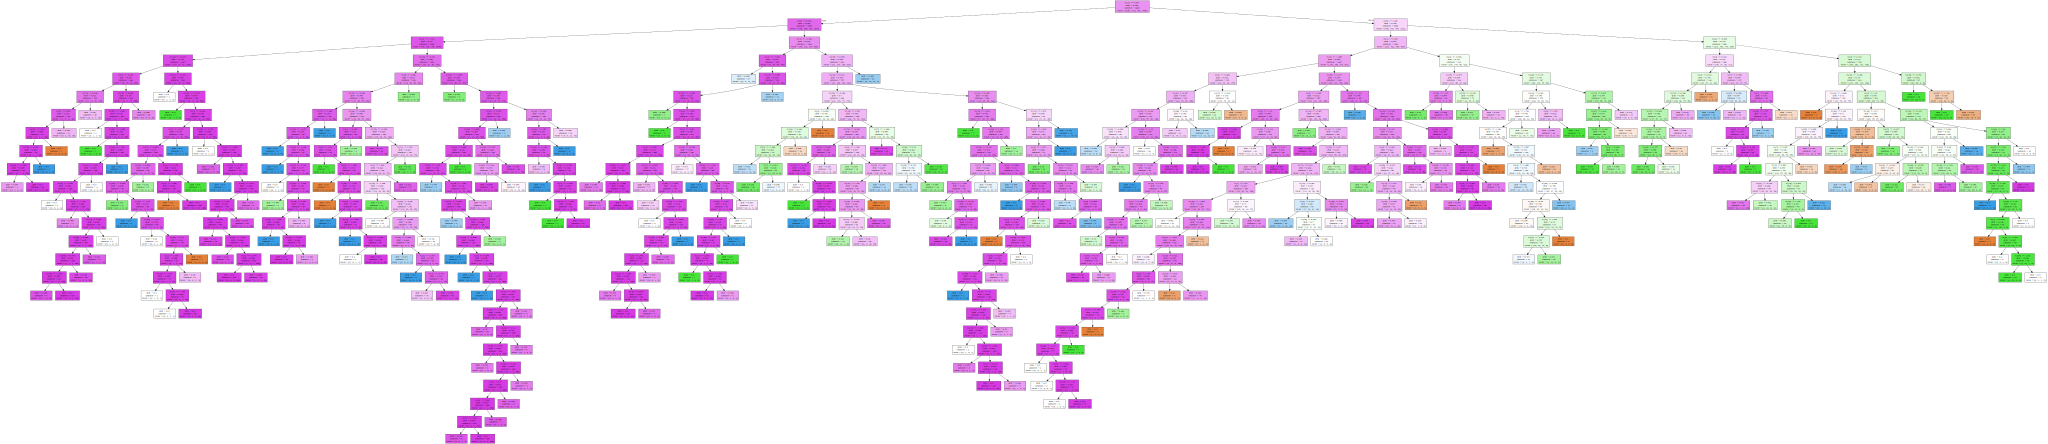

In [89]:
dot_data = tree.export_graphviz(grid_cv2.best_estimator_, out_file=None, filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [90]:
graph.render("decision_tree_graphivz") #output decision tree

'decision_tree_graphivz.png'

In [91]:
# scoring = balanced_accuracy
clf1 = DecisionTreeClassifier(max_depth=50,min_samples_split=50)
clf1= clf1.fit(X_train,y_train)
y_pred1 = clf1.predict(X_val)
print("Decision Tree accuracy on testing set is:",metrics.accuracy_score(y_val, y_pred1))

Decision Tree accuracy on testing set is: 0.6290097629009763


In [92]:
# scoring = f1_macro
clf2 = DecisionTreeClassifier(max_depth=100,min_samples_split=50)
clf2.fit(X_train,y_train)
y_pred_dt_train = clf2.predict(X_train)
y_pred2 = clf2.predict(X_val)
print("Decision Tree accuracy on testing set is:",metrics.accuracy_score(y_train, y_pred_dt_train))
print("Decision Tree accuracy on testing set is:",metrics.accuracy_score(y_val, y_pred2))

Decision Tree accuracy on testing set is: 0.7741067424129168
Decision Tree accuracy on testing set is: 0.6279637377963738


<a id='random_forest'></a>

## 6 f. Random Forest

In [93]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train.ravel())

RandomForestClassifier()

In [94]:
#takes a long time to run... BEST PARAMS: {'max_depth': 50, 'min_samples_split': 50, 'n_estimators': 5}
"""
rf_parameters = {"min_samples_split":[50,100,200],
             "max_depth":[1,5,10,50,100],
             "n_estimators":[5, 50, 250, 500]}

rf_grid_cv = GridSearchCV(estimator=rf, param_grid=rf_parameters, cv=5,scoring="f1_macro") 
rf_grid_cv.fit(X_train,y_train.ravel()) # fit the model

print_results(rf_grid_cv)
"""

'\nrf_parameters = {"min_samples_split":[50,100,200],\n             "max_depth":[1,5,10,50,100],\n             "n_estimators":[5, 50, 250, 500]}\n\nrf_grid_cv = GridSearchCV(estimator=rf, param_grid=rf_parameters, cv=5,scoring="f1_macro") \nrf_grid_cv.fit(X_train,y_train.ravel()) # fit the model\n\nprint_results(rf_grid_cv)\n'

In [95]:
clf_RF = RandomForestClassifier(max_depth=50,min_samples_split=50,n_estimators=5)
clf_RF = clf_RF.fit(X_train,y_train)
y_pred_rf_train = clf_RF.predict(X_train)
y_pred_rf = clf_RF.predict(X_val)
print("Random Forest accuracy on training set is:",metrics.accuracy_score(y_train, y_pred_rf_train))
print("Random Forest accuracy on testing set is:",metrics.accuracy_score(y_val, y_pred_rf))

Random Forest accuracy on training set is: 0.7464493945283301
Random Forest accuracy on testing set is: 0.6652719665271967


<a id='knn'></a>

## 6 g. KNN

In [96]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [97]:
KNN_fit = clf.predict(X_val)

In [98]:
clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [99]:
#commented out because this code takes a very long time to run.
#best params: {'algorithm': 'auto', 'n_neighbors': 50, 'p': 1, 'weights': 'distance'}
#param_grid = {
#    'algorithm': ['auto', 'brute', 'ball_tree', 'kd_tree'],
#    'n_neighbors': [2, 5, 10, 20, 50],
#    'p': [ 1, 2, 3], #1 is the same as specifying euclidean distance and 2 is the same as Manhattan
#    'weights': ['uniform', 'distance']
#    }

#grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, cv = 5)
#grid_search.fit(features_norms, Y)

#print(grid_search.best_params_)

In [100]:
clf = KNeighborsClassifier(algorithm = 'auto', n_neighbors = 50, p = 1, weights = 'distance')

In [101]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=50, p=1, weights='distance')

In [102]:
KNN_train_pred = clf.predict(X_train)
KNN_fit = clf.predict(X_val)
print("KNN accuracy on training set is:",metrics.accuracy_score(y_train, KNN_train_pred))
print("KNN accuracy on testing set is:",metrics.accuracy_score(y_val, KNN_fit))

KNN accuracy on training set is: 1.0
KNN accuracy on testing set is: 0.6851464435146444


<a id='neural'></a>

## 6 h. Neural Network

In [103]:
warnings.filterwarnings("ignore")

hidden_layer_range = range(10,25)
scores_mlp = {}
scores_list_mlp = []
for h in hidden_layer_range:
    mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(h,), random_state=2020,max_iter=150)
    mlp.fit(X_train, y_train) 
    y_pred=mlp.predict(X_val)
    scores_mlp[h] = accuracy_score(y_val,y_pred)
    scores_list_mlp.append(accuracy_score(y_val,y_pred))

In [104]:
hidden_layers = scores_list_mlp.index(max(scores_list_mlp))+1
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=hidden_layers,max_iter=150, warm_start=True, random_state=1)
mlp.fit(X_train, y_train)
y_pred_nn_train=mlp.predict(X_train)
y_pred_nn=mlp.predict(X_val)
print("Training accuracy for Neural Network: ",accuracy_score(y_train,y_pred_nn_train)*100)

print("Testing accuracy for Neural Network: ",accuracy_score(y_val,y_pred_nn)*100)
warnings.resetwarnings()


Training accuracy for Neural Network:  75.21303632830019
Testing accuracy for Neural Network:  70.2231520223152


<a id='sgd'></a>

## 6 i. Stochastic Gradient Descent

In [105]:
clf_SGD = SGDClassifier()
clf_SGD.fit(X_train, y_train)

SGD_parameters = {'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], # learning rate
                #'n_iter_': [1000], # number of epochs
                'penalty': ['l2'],
                'n_jobs': [-1]}

SGD_grid_cv = GridSearchCV(estimator=clf_SGD, param_grid=SGD_parameters, cv=5,scoring="f1_macro") 
SGD_grid_cv.fit(X_train,y_train.ravel()) # fit the model

print_results(SGD_grid_cv)

BEST PARAMS: {'alpha': 0.0001, 'n_jobs': -1, 'penalty': 'l2'}

0.4 (+/-0.029) for {'alpha': 0.0001, 'n_jobs': -1, 'penalty': 'l2'}
0.365 (+/-0.021) for {'alpha': 0.001, 'n_jobs': -1, 'penalty': 'l2'}
0.369 (+/-0.016) for {'alpha': 0.01, 'n_jobs': -1, 'penalty': 'l2'}
0.354 (+/-0.027) for {'alpha': 0.1, 'n_jobs': -1, 'penalty': 'l2'}
0.279 (+/-0.023) for {'alpha': 1.0, 'n_jobs': -1, 'penalty': 'l2'}
0.215 (+/-0.052) for {'alpha': 10.0, 'n_jobs': -1, 'penalty': 'l2'}
0.156 (+/-0.16) for {'alpha': 100.0, 'n_jobs': -1, 'penalty': 'l2'}
0.223 (+/-0.05) for {'alpha': 1000.0, 'n_jobs': -1, 'penalty': 'l2'}


In [106]:
clf_SGD = SGDClassifier(alpha = 0.0001,n_jobs = -1, penalty = 'l2')
clf_SGD.fit(X_train, y_train)
pred_SGD_train = clf_SGD.predict(X_train)
pred_SGD = clf_SGD.predict(X_val)
print("SGD testing set accuracy:",round(metrics.accuracy_score(y_true = y_train, y_pred = pred_SGD_train),4))
print("SGD testing set accuracy:",round(metrics.accuracy_score(y_true = y_val, y_pred = pred_SGD),4))

SGD testing set accuracy: 0.6473
SGD testing set accuracy: 0.6423


In [107]:
clf_SGD.fit(X_train_kpca,y_train)
sgd_kpca_pred = clf_SGD.predict(X_val_kpca)
print("SGD testing set accuracy after applying KPCA:",round(metrics.accuracy_score(y_true = y_val, y_pred = sgd_kpca_pred),4))

SGD testing set accuracy after applying KPCA: 0.652


<a id='svc'></a>
## 6 j. Support Vector Classifier

In [108]:
from sklearn.svm import SVC
svc = SVC(kernel ='rbf')
svc.fit(X_train, y_train)
predicted_train = svc.predict(X_train)
predicted_val = svc.predict(X_val)

In [109]:
#param_grid = {
#    'C': [0.1, 0.5, 1, 2, 5, 10, 20],
#    'gamma': ['scale', 'auto', 1, 2, 3]
#    }

#grid_search = GridSearchCV(estimator = svc, param_grid = param_grid, scoring = 'f1_macro')
#predicted = grid_search.fit(X_train, y_train)

#print(grid_search.best_params_)

#Takes a long time to run, output: {'C': 20, 'gamma': 'scale'}


In [110]:
svc = SVC(kernel ='rbf', C = 20, gamma = 'scale')
svc.fit(X_train, y_train)
predicted_train = svc.predict(X_train)
SVC_fit = svc.predict(X_val)

<a id='imbalanced'></a>

## 5 k. Imbalanced Class Techniques

To combat the imbalanced distribution of the target variable, we tried rebalancing techniques on a few models (logistic regression and a neural network)

## Oversampling

Below you will see that some of the accuracies are actually higher on the test set for oversampling. This has to do with the oversampling process: only the training set is oversampled to avoid data leakage. However the neural network model has high variance on the training model leading to a high discrepancy in training/testing errors.

In [111]:
X_train_oversample = pd.DataFrame(X_train)
y_train_oversample = np.array(y_train)
X_train_oversample["y"] = y_train_oversample

count_4, count_3, count_2, count_1 = X_train_oversample["y"].value_counts()

In [112]:
features_class_1 = X_train_oversample[y_train_oversample==1]
features_class_2 = X_train_oversample[y_train_oversample==2]
features_class_3 = X_train_oversample[y_train_oversample==3]
features_class_4 = X_train_oversample[y_train_oversample==4]

In [113]:
features_class_1_over = features_class_1.sample(count_4,replace=True)
features_class_2_over = features_class_2.sample(count_4,replace=True)
features_class_3_over = features_class_3.sample(count_4,replace=True)
features_over_sampled = pd.concat([features_class_1_over,features_class_2_over,features_class_3_over,features_class_4],axis=0)
X_train_over = features_over_sampled.drop('y',axis=1)
y_train_over = features_over_sampled['y']

In [114]:
clf_RF_over = RandomForestClassifier(max_depth=50,min_samples_split=50,n_estimators=5)
clf_RF_over.fit(X_train_over,y_train_over)
y_pred_rf_train_over = clf_RF.predict(X_train_over)
y_pred_rf_over = clf_RF.predict(X_val)
print("Random Forest accuracy on train set with over sampling is:",metrics.accuracy_score(y_train_over, y_pred_rf_train_over))
print("Random Forest accuracy on test set with over sampling is:",metrics.accuracy_score(y_val, y_pred_rf_over))

Random Forest accuracy on train set with over sampling is: 0.49360812425328554
Random Forest accuracy on test set with over sampling is: 0.6652719665271967


In [115]:
lr1_over = LogisticRegression(max_iter = 10000, solver='lbfgs', penalty='l2', C=1,multi_class="multinomial")
lr1_over.fit(X_train_over,y_train_over)
log_reg_pred_train_over = lr1_over.predict(X_train_over)
log_reg_pred_test_over = lr1_over.predict(X_val)
print("Logistic regression with over-sampling training set accuracy:",round(metrics.accuracy_score(y_true = y_train_over, y_pred = log_reg_pred_train_over),4))
print("Logistic regression with over-sampling testing set accuracy:",round(metrics.accuracy_score(y_true = y_val, y_pred = log_reg_pred_test_over),4))


Logistic regression with over-sampling training set accuracy: 0.5155
Logistic regression with over-sampling testing set accuracy: 0.5506


In [116]:
warnings.filterwarnings("ignore")

hidden_layer_range = range(10,25)
scores_mlp = {}
scores_list_mlp = []
for h in hidden_layer_range:
    mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(h,), random_state=2020,max_iter=150)
    mlp.fit(X_train_over, y_train_over) 
    y_pred_over=mlp.predict(X_val)
    scores_mlp[h] = accuracy_score(y_val,y_pred_over)
    scores_list_mlp.append(accuracy_score(y_val,y_pred_over))

In [117]:
hidden_layers = scores_list_mlp.index(max(scores_list_mlp))+1
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=hidden_layers,max_iter=150, warm_start=True, random_state=1)
mlp.fit(X_train_over, y_train_over)
y_pred_over_nn_train=mlp.predict(X_train_over)
y_pred_over_nn=mlp.predict(X_val)

print("Accuracy for Neural Network training set with over-sampling:",accuracy_score(y_train_over, y_pred_over_nn_train)*100)
print("Accuracy for Neural Network testing set with over-sampling: ",accuracy_score(y_val,y_pred_over_nn)*100)
warnings.resetwarnings()


Accuracy for Neural Network training set with over-sampling: 77.42532855436082
Accuracy for Neural Network testing set with over-sampling:  59.44909344490934


## Undersampling

In [118]:
features_class_2_under = features_class_2.sample(count_1,replace=True)
features_class_3_under = features_class_3.sample(count_1,replace=True)
features_class_4_under = features_class_4.sample(count_1,replace=True)

features_under_sampled = pd.concat([features_class_1,features_class_2_under,features_class_3_under,features_class_4_under],axis=0)
X_train_under = features_under_sampled.drop('y',axis=1)
y_train_under = features_under_sampled['y']


**Logistic Regression**

In [119]:
lr1_under = LogisticRegression(max_iter = 10000, solver='lbfgs', penalty='l2', C=1,multi_class="multinomial")
lr1_under.fit(X_train_under,y_train_under)
log_reg_pred_train_under = lr1_under.predict(X_train_under)
log_reg_pred_test_under = lr1_under.predict(X_val)
print("Logistic regression training set accuracy with under-sampling:",round(metrics.accuracy_score(y_true = y_train_under, y_pred = log_reg_pred_train_under),4))
print("Logistic regression testing set accuracy with under-sampling:",round(metrics.accuracy_score(y_true = y_val, y_pred = log_reg_pred_test_under),4))


Logistic regression training set accuracy with under-sampling: 0.5324
Logistic regression testing set accuracy with under-sampling: 0.5418


**Neural Network**

In [120]:
warnings.filterwarnings("ignore")

hidden_layer_range = range(10,25)
scores_mlp = {}
scores_list_mlp = []
for h in hidden_layer_range:
    mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(h,), random_state=2020,max_iter=150)
    mlp.fit(X_train_under, y_train_under) 
    y_pred_under=mlp.predict(X_val)
    scores_mlp[h] = accuracy_score(y_val,y_pred_under)
    scores_list_mlp.append(accuracy_score(y_val,y_pred_under))

In [121]:
hidden_layers = scores_list_mlp.index(max(scores_list_mlp))+1
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=hidden_layers,max_iter=150, warm_start=True, random_state=1)
mlp.fit(X_train_under, y_train_under)
y_pred_under_nn_train=mlp.predict(X_train_under)
y_pred_under_nn=mlp.predict(X_val)

print("Accuracy for Neural Network training set with under-sampling: ",accuracy_score(y_train_under,y_pred_under_nn_train)*100)
print("Accuracy for Neural Network testing set with under-sampling: ",accuracy_score(y_val,y_pred_under_nn)*100)
warnings.resetwarnings()


Accuracy for Neural Network training set with under-sampling:  82.61861313868614
Accuracy for Neural Network testing set with under-sampling:  50.697350069735


<a id='experiment_results'></a>

# 7 a. Experiment Results


Classification reports are included for each of the models for the test set. The main metric of interest is macro avg F-1 score (the measure used to evaluate performance in the Kaggle competition). We also include training and testing set confusion matrices.

**Logistic Regression :** 

Grid Search CV found the best parameters as max_iter = 10000, solver='lbfgs', penalty='l2', C=10,multi_class="multinomial". Macro average F-1 was 0.4 but the "Vulnerable" class had weak measures indicating there may be opportunity to improve.


In [122]:
print(classification_report(y_val, log_reg_pred_test, target_names=["Extreme Poverty","Moderate Poverty","Vulnerable","Not Vulnerable"]))

                  precision    recall  f1-score   support

 Extreme Poverty       0.39      0.25      0.31       207
Moderate Poverty       0.40      0.31      0.35       482
      Vulnerable       0.37      0.06      0.10       368
  Not Vulnerable       0.74      0.94      0.82      1811

        accuracy                           0.67      2868
       macro avg       0.47      0.39      0.40      2868
    weighted avg       0.61      0.67      0.61      2868



In [123]:
print("Logistic Regression with Over-Sampling confusion matix for training set:")
print(confusion_matrix(y_train, log_reg_pred_train))

print("Logistic Regression with Over-Sampling confusion matix for testing set:")
print(confusion_matrix(y_val, log_reg_pred_test))

Logistic Regression with Over-Sampling confusion matix for training set:
[[ 175  157   12  204]
 [  89  395   25  606]
 [  31  142   63  605]
 [  29  176   40 3940]]
Logistic Regression with Over-Sampling confusion matix for testing set:
[[  52   57    4   94]
 [  48  150   24  260]
 [  11   80   22  255]
 [  21   86   10 1694]]


**Adaboost:**

Accuracy on the testing set is 0.64. Macro average F-1 is lower than most of the other models. The vulnerable class had poor performance (similar to logistic regression).

In [124]:
print(classification_report(y_val, pred10, target_names=["Extreme Poverty","Moderate Poverty","Vulnerable","Not Vulnerable"]))

                  precision    recall  f1-score   support

 Extreme Poverty       0.27      0.24      0.25       207
Moderate Poverty       0.34      0.26      0.29       482
      Vulnerable       0.24      0.02      0.04       368
  Not Vulnerable       0.72      0.91      0.81      1811

        accuracy                           0.64      2868
       macro avg       0.39      0.36      0.35      2868
    weighted avg       0.56      0.64      0.58      2868



In [125]:
print("Adaboost confusion matix for training set:")
print(confusion_matrix(y_train, pred9))

print("Adaboost confusion matix for testing set:")
print(confusion_matrix(y_val, pred10))

Adaboost confusion matix for training set:
[[ 191  157    6  194]
 [ 118  360   11  626]
 [  56  171   28  586]
 [  79  226   25 3855]]
Adaboost confusion matix for testing set:
[[  49   58    6   94]
 [  72  124    8  278]
 [  16   80    9  263]
 [  43  100   15 1653]]


**Gaussian Naive Bayes:**

The accuracy we got on the testing set is 0.57 after running GridSearch trying to find the best parameter for var_smoothing. The macro average is 0.34. While GNB runs rather quickly, model performance is not as good as other models we used.


In [126]:
print(classification_report(y_val, NB_fit_CV5, target_names=["Extreme Poverty","Moderate Poverty","Vulnerable","Not Vulnerable"]))

                  precision    recall  f1-score   support

 Extreme Poverty       0.21      0.21      0.21       207
Moderate Poverty       0.24      0.18      0.21       482
      Vulnerable       0.20      0.16      0.18       368
  Not Vulnerable       0.72      0.80      0.76      1811

        accuracy                           0.57      2868
       macro avg       0.34      0.34      0.34      2868
    weighted avg       0.54      0.57      0.55      2868



In [127]:
print("GNB confusion matix for training set:")
print(confusion_matrix(y_train, NB_fit_train))

print("GNB confusion matix for testing set:")
print(confusion_matrix(y_val, NB_fit_CV5))

GNB confusion matix for training set:
[[ 120   91   97  240]
 [ 113  240  171  591]
 [  66  119  146  510]
 [ 148  419  225 3393]]
GNB confusion matix for testing set:
[[  44   41   29   93]
 [  69   89   84  240]
 [  28   60   58  222]
 [  66  187  116 1442]]


**Decision Tree:**

Using GridSearch for hyperparameter tuning, the best model with the current data used max_depth = 100 and min_samples_split = 50. While accuracy was slightly lower than logistic regression, decision tree was actually more sensitive to classes with lower samples. F-1 macro average was 0.43, an improvement from logistic regression. The "Vulnerable" class was much better than logistic regression.

In [128]:
print(classification_report(y_val, y_pred2,target_names=["Extreme Poverty","Moderate Poverty","Vulnerable","Not Vulnerable"]))

                  precision    recall  f1-score   support

 Extreme Poverty       0.32      0.30      0.31       207
Moderate Poverty       0.37      0.37      0.37       482
      Vulnerable       0.32      0.24      0.27       368
  Not Vulnerable       0.77      0.81      0.79      1811

        accuracy                           0.63      2868
       macro avg       0.44      0.43      0.44      2868
    weighted avg       0.61      0.63      0.62      2868



In [129]:
print("Decision Tree confusion matix for training set:")
print(confusion_matrix(y_train, y_pred_dt_train))

print("Decision Tree confusion matix for testing set:")
print(confusion_matrix(y_val, y_pred2))

Decision Tree confusion matix for training set:
[[ 271   80   43  154]
 [  62  697   97  259]
 [  49  142  370  280]
 [  29  171  145 3840]]
Decision Tree confusion matix for testing set:
[[  62   52   25   68]
 [  62  179   40  201]
 [  32   73   89  174]
 [  37  175  128 1471]]


**Random Forest:** 

The best model used a max_depth = 50, min_samples_split = 50, and n-estimators = 5. The accuracy on the testing set was higher but other metrics were worse than the decision tree. Given the extremely slow process of hyperparameter tuning and worse performance on random forest (possibly due to overfitting), random forests may not be a useful model going forward.

In [130]:
print(classification_report(y_val, y_pred_rf,target_names=["Extreme Poverty","Moderate Poverty","Vulnerable","Not Vulnerable"]))

                  precision    recall  f1-score   support

 Extreme Poverty       0.47      0.11      0.17       207
Moderate Poverty       0.44      0.27      0.33       482
      Vulnerable       0.40      0.06      0.10       368
  Not Vulnerable       0.70      0.96      0.81      1811

        accuracy                           0.67      2868
       macro avg       0.50      0.35      0.35      2868
    weighted avg       0.60      0.67      0.59      2868



In [131]:
print("Random Forest confusion matix for training set:")
print(confusion_matrix(y_train, y_pred_rf_train))

print("Random Forest confusion matix for testing set:")
print(confusion_matrix(y_val, y_pred_rf))

Random Forest confusion matix for training set:
[[ 152   94   10  292]
 [  11  556   27  521]
 [  11   97  182  551]
 [   5   61   16 4103]]
Random Forest confusion matix for testing set:
[[  22   47    7  131]
 [  13  129   13  327]
 [   9   57   21  281]
 [   3   60   12 1736]]


**K-NN:**

KNN seems to have the best performance with this data. Without Gridsearch CV, all classes have very good performance (relative to other models) with macro average F-1 of 0.6 and accuracy of 0.74

In [132]:
print(classification_report(y_val, KNN_fit, target_names=["Extreme Poverty","Moderate Poverty","Vulnerable","Not Vulnerable"]))

                  precision    recall  f1-score   support

 Extreme Poverty       0.95      0.18      0.30       207
Moderate Poverty       0.77      0.20      0.32       482
      Vulnerable       0.82      0.08      0.15       368
  Not Vulnerable       0.68      0.99      0.80      1811

        accuracy                           0.69      2868
       macro avg       0.80      0.36      0.39      2868
    weighted avg       0.73      0.69      0.60      2868



In [133]:
print("KNN confusion matix for training set:")
print(confusion_matrix(y_train, KNN_train_pred))

print("KNN confusion matix for testing set:")
print(confusion_matrix(y_val, KNN_fit))

KNN confusion matix for training set:
[[ 548    0    0    0]
 [   0 1115    0    0]
 [   0    0  841    0]
 [   0    0    0 4185]]
KNN confusion matix for testing set:
[[  37    6    1  163]
 [   2   96    4  380]
 [   0   15   31  322]
 [   0    8    2 1801]]


**Neural Network**


In [134]:
print(classification_report(y_val, y_pred_nn, target_names=["Extreme Poverty","Moderate Poverty","Vulnerable","Not Vulnerable"]))

                  precision    recall  f1-score   support

 Extreme Poverty       0.46      0.46      0.46       207
Moderate Poverty       0.47      0.40      0.43       482
      Vulnerable       0.50      0.21      0.30       368
  Not Vulnerable       0.78      0.91      0.84      1811

        accuracy                           0.70      2868
       macro avg       0.56      0.50      0.51      2868
    weighted avg       0.67      0.70      0.68      2868



In [135]:
print("Neural Network confusion matix for training set:")
print(confusion_matrix(y_train, y_pred_nn_train))

print("Neural Network confusion matix for testing set:")
print(confusion_matrix(y_val, y_pred_nn))

Neural Network confusion matix for training set:
[[ 342   94    8  104]
 [ 101  551   79  384]
 [  38  135  226  442]
 [  35  167   71 3912]]
Neural Network confusion matix for testing set:
[[  96   46    5   60]
 [  63  192   30  197]
 [  23   73   77  195]
 [  26   95   41 1649]]


**Stochastic Gradient Descent**

In [136]:
print(classification_report(y_val, pred_SGD.round(), target_names=["Extreme Poverty","Moderate Poverty","Vulnerable","Not Vulnerable"]))

                  precision    recall  f1-score   support

 Extreme Poverty       0.26      0.29      0.28       207
Moderate Poverty       0.38      0.29      0.33       482
      Vulnerable       0.21      0.07      0.11       368
  Not Vulnerable       0.76      0.89      0.82      1811

        accuracy                           0.64      2868
       macro avg       0.40      0.39      0.38      2868
    weighted avg       0.59      0.64      0.61      2868



In [137]:
print("SGD confusion matix for training set:")
print(confusion_matrix(y_train, pred_SGD_train))

print("SGD confusion matix for testing set:")
print(confusion_matrix(y_val, pred_SGD))

SGD confusion matix for training set:
[[ 197  162   43  146]
 [ 180  320   92  523]
 [  98  144   70  529]
 [ 102  235  105 3743]]
SGD confusion matix for testing set:
[[  61   64   19   63]
 [  74  142   48  218]
 [  38   62   27  241]
 [  60  106   33 1612]]


**Support Vector Classifier**

In [138]:
print(classification_report(y_val, SVC_fit.round(), target_names=["Extreme Poverty","Moderate Poverty","Vulnerable","Not Vulnerable"]))

                  precision    recall  f1-score   support

 Extreme Poverty       0.70      0.69      0.69       207
Moderate Poverty       0.72      0.68      0.70       482
      Vulnerable       0.74      0.61      0.67       368
  Not Vulnerable       0.88      0.93      0.91      1811

        accuracy                           0.83      2868
       macro avg       0.76      0.73      0.74      2868
    weighted avg       0.82      0.83      0.83      2868



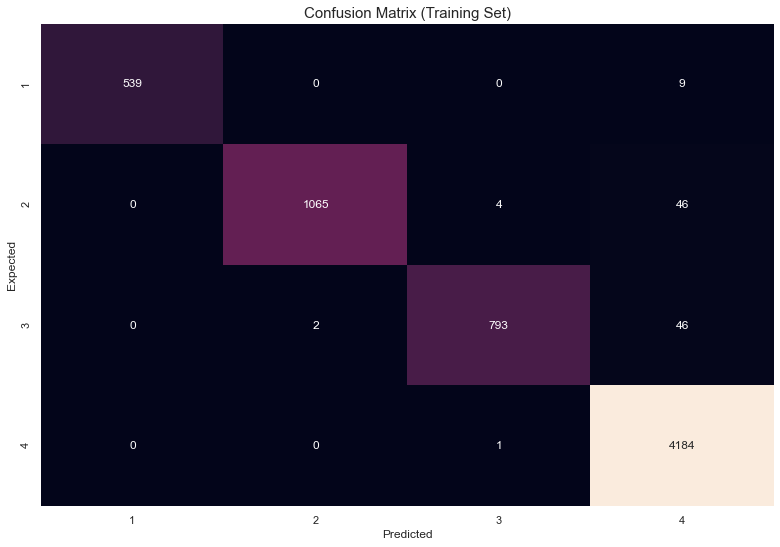

In [139]:
confusion_matrix_svc =  pd.crosstab(index=np.ravel(y_train), columns=predicted_train.ravel(), rownames=['Expected'], colnames=['Predicted'])
sns.heatmap(confusion_matrix_svc, annot=True, square=False, fmt='', cbar=False)
plt.title("Confusion Matrix (Training Set)", fontsize = 15)
plt.show()

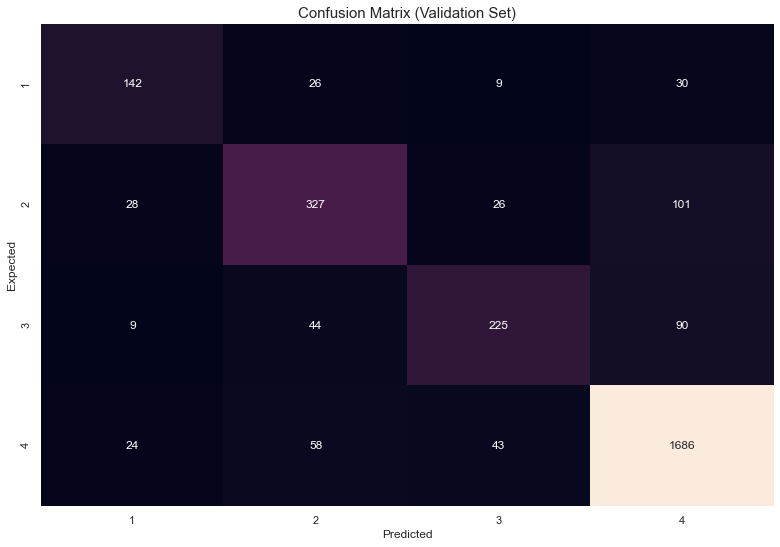

In [140]:
confusion_matrix_svc =  pd.crosstab(index=np.ravel(y_val), columns=SVC_fit.ravel(), rownames=['Expected'], colnames=['Predicted'])
sns.heatmap(confusion_matrix_svc, annot=True, square=False, fmt='', cbar=False)
plt.title("Confusion Matrix (Validation Set)", fontsize = 15)
plt.show()

<a id='experiment_results_b'></a>

# 7 b. Experiment Results for Models Using Class Rebalancing Techniques (select models)

Oversampling generally performed better than oversampling. Oversampling helped logistic regression slightly while oversampling hindered neural network performance.

**Logistic Regression (oversampling)**

In [141]:
print(classification_report(y_val, log_reg_pred_test_over, target_names=["Extreme Poverty","Moderate Poverty","Vulnerable","Not Vulnerable"]))

                  precision    recall  f1-score   support

 Extreme Poverty       0.24      0.53      0.33       207
Moderate Poverty       0.36      0.30      0.33       482
      Vulnerable       0.21      0.36      0.26       368
  Not Vulnerable       0.87      0.66      0.75      1811

        accuracy                           0.55      2868
       macro avg       0.42      0.46      0.42      2868
    weighted avg       0.66      0.55      0.59      2868



**Neural Network (oversampling)**

In [142]:
print(classification_report(y_val, y_pred_over_nn, target_names=["Extreme Poverty","Moderate Poverty","Vulnerable","Not Vulnerable"]))

                  precision    recall  f1-score   support

 Extreme Poverty       0.38      0.63      0.47       207
Moderate Poverty       0.46      0.58      0.51       482
      Vulnerable       0.30      0.54      0.38       368
  Not Vulnerable       0.88      0.61      0.72      1811

        accuracy                           0.59      2868
       macro avg       0.50      0.59      0.52      2868
    weighted avg       0.70      0.59      0.62      2868



**Logistic Regression (undersampling)**

In [143]:
print(classification_report(y_val, log_reg_pred_test_under, target_names=["Extreme Poverty","Moderate Poverty","Vulnerable","Not Vulnerable"]))

                  precision    recall  f1-score   support

 Extreme Poverty       0.23      0.57      0.33       207
Moderate Poverty       0.33      0.29      0.31       482
      Vulnerable       0.21      0.33      0.25       368
  Not Vulnerable       0.86      0.65      0.74      1811

        accuracy                           0.54      2868
       macro avg       0.41      0.46      0.41      2868
    weighted avg       0.64      0.54      0.58      2868



**Neural Network (undersampling)**

In [144]:
print(classification_report(y_val, y_pred_under_nn, target_names=["Extreme Poverty","Moderate Poverty","Vulnerable","Not Vulnerable"]))

                  precision    recall  f1-score   support

 Extreme Poverty       0.25      0.60      0.35       207
Moderate Poverty       0.37      0.41      0.39       482
      Vulnerable       0.27      0.53      0.36       368
  Not Vulnerable       0.85      0.52      0.64      1811

        accuracy                           0.51      2868
       macro avg       0.43      0.51      0.43      2868
    weighted avg       0.65      0.51      0.54      2868



<a id='conclusion'></a>

# 8. Conclusion

To summarize this analysis and refer back to our original research questions, we were able to identify features that made up the first few principal components in our PCA. Components tended to have high loading values from features that were in similar groups as specified by our data dictionary. We also determined that certain principal components are likely more useful in identifying affluent households while other principal components are more useful in identifying impoverished households.

We developed multiple models that perform better than a baseline model without hyperparameter tuning. Data reduction, rebalancing techniques, and hyperparameter tuning generally help model performance. Certain algorithms also perform better than others for a multitude of reasons, which we examined extensively in our experiment results section.

For regional differences (our third research question) we identified that models build on subsets of the data split on the region helped with model performance compared to using all of the data together. This is an important discovery: this indicates that to maximize generalizability of this model, the model should be applied to homogeneous groups when possible rather than treating all observations as equal. We also demonstrated that the data can predict if a household is in a rural or urban environment, indicating stark differences in households between urban and rural areas.

For our fourth research question (model differences between traditional PMT features vs all features), KNN actually had better performance when only using traditional PMT features while SVC had much better performance when including all features. Based on our results from regional differences, this seems to be a result of differences in similarity between different groups of observations (i.e. observations from different regions). For example, perhaps in a more affluent region, people who are well off tend to have more kids and therefore more people living in the house since finances are not a worry for them. In poorer regions where access to birth control may not be available, more children would be indicative of poverty. It seems the conflation of non-homogenous groups hurts the predictive power of most models, but SVC manages to do well even when including all features. This might be because the conflation of non-homogeneuous groups does not significantly impact the data points where the decision boundary is located. Therefore, **SVC would be considered our best model**: it has the highest overall metrics (F-1 Macro average, recall and precision), does much better with additional features, and appears to be the most generalizable if social welfare needs are to be predicted in other countries.

**What more could you do on this data if you had more time?**

With more time, we could have tried more models on the Kaggle holdout set. We tried some with moderate success, but as we gained more insights based on findings from our research questions, it became more clear on approaches we could have taken to have a successful model on the Kaggle holdout test set. Given the Kaggle competition is a Kernel only competition, making drastic changes required essentially making an entire other notebook which takes a lot of time.

It would also be interesting to apply the knowledge we gained to other PMT related datasets to see if findings are similar.










    


<a id='contributions'></a>

# 9. Contributions

<a id='max_rodrigues'></a>

## 9 a. Max Rodrigues
* Wrote code to handle redundant variables and missing values (handled missing values by both KNN imputation and by taking averages of aggregations of data). 
* Did exploratory analysis (correlation plot, scatterplots, countplots and lmplots)
* Wrote code for PCA/Feature Selection
* logistic regression with & without gridsearch CV neural network. 
* Applied rebalancing techniques.
* Made updates to data dictionary to be more concise.
* Wrote/helped with abstract, introduction, conclusion.
* Analyzed PCA loadings and how they related to feature importance (from logistic regression)
* Helped with research questions (built models that demonstrate some models perform worse with the conflation of dissimilar regions)
* Cleaned and organized code in the notebook
* found reference that described PMT in detail, and reference describing why KNN handles imbalanced data well



<a id='andrew_schiek'></a>

## 9 b. Andrew Schiek
Andrew Schiek: I have contributed to the exploratory analysis, machine learning applications, and the research questions. For the exploratory analysis I examined histograms of the float variables. For machine learning applications I developed the models for the Guassian Naive Bayes, K-Nearest Neighbors, and SVC algorithms. I created the baseline and grid search for each as well as doing the analysis. I answered each of the research questions and developed the models associated, which included but was not limited to the non-observable parameter models. Additionally I contributed to the conclusion for the write-up


<a id='Xintong_Li'></a>

## 9 c. Xintong Li
* Preparing Data: Data Cleaning
* Exploratory Analysis: PCA (not included in the report) and KPCA and Histograms
* Machine Learning Models: Decison Tree, Random Forest, SGD
* Feature Importance
* Expriment Results: Summarizing ML models and results

<a id='Mashall_Jahangir'></a>

## 9 d. Mashall Jahangir
- Exploratory Analysis :
    Pie Chart, Boxplots and Variable Distribution
- Machine Learning Model :
    Gaussian Naive Bayes Classifier, Random Forest and Adaboost Model
- Overall : Helped writing the notebook sections data dictionary, eda, references, abstract.

<a id='references'></a>
## 10. References


1.   Zhang, J.P. and Mani, I. (2003) KNN Approach to Unbalanced Data Distributions: A Case Study Involving Information Extraction. Proceeding of International Conference on Machine Learning (ICML 2003), Workshop on Learning from Imbalanced Data Sets, Washington DC, 21 August 2003.

2.   Social Protection & Labor team (2010). Measuring income and poverty using Proxy Means Tests. Retrieved from https://olc.worldbank.org/sites/default/files/1.pdf

3. Adrian G. Rodriguez, Stephen M. Smith, A comparison of determinants of urban, rural and farm poverty in Costa Rica, World Development, Volume 22, Issue 3,1994,Pages 381-397,ISSN 0305-750X,https://doi.org/10.1016/0305-750X(94)90129-5.

4. J. H. Mohamud and O. N. Gerek, "Poverty Level Characterization via Feature Selection and Machine Learning," 2019 27th Signal Processing and Communications Applications Conference (SIU), Sivas, Turkey, 2019, pp. 1-4, doi: 10.1109/SIU.2019.8806548.